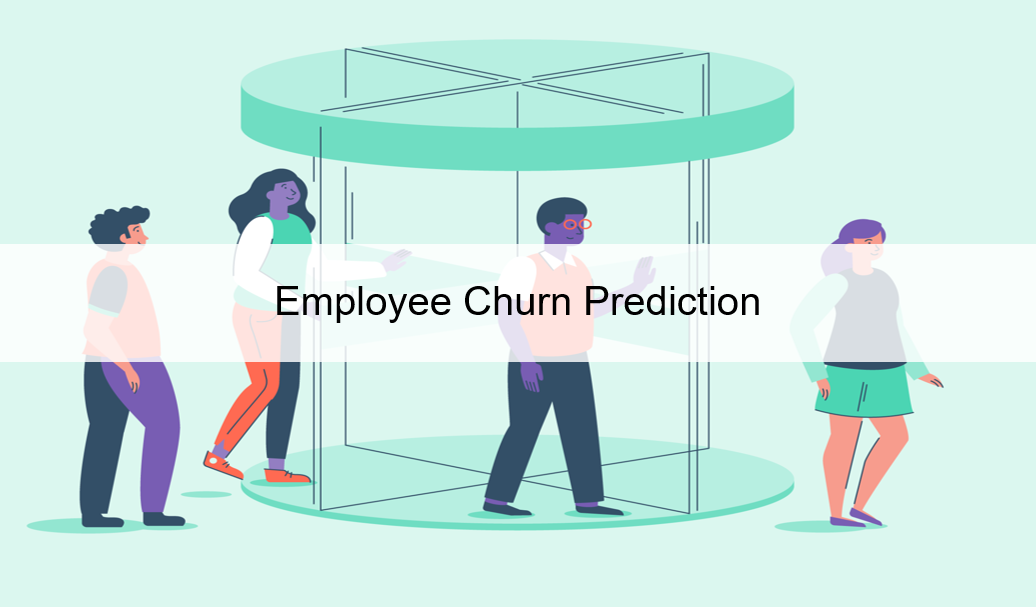

#### Data Goreng - Chen Bao Gang | Ng Boon Jane | Sam Tey | Soo Kar Lok | Yin Khar Shin 

## List of Content

* [Introduction](#Introduction)  
    * [Overview](#Overview)
    * [Research Questions](#Research-Questions)
    * [Research Objectives](#Research-Objectives)
    * [Significance](#Significance)
    * [Motivations](#Motivation)
    * [Related Work](#Related-Work)
* [Methodology](#Methodology)
    * [Dataset Description](#Dataset-Description)
    * [Data Pre-processing Methods](#Data-Pre-processing-Methods)
    * [Machine Learning Algorithms](#Machine-Learning-Algorithms)
* [Data Analysis](#Data-Analysis)
    * [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
* [Data Pre-processing](#Data-Pre-processing)
    * [Data Cleaning](#Data-Cleaning)
    * [Data Integration - Correlation](#Data-Integration---Correlation)
    * [Data Reduction - Principle Component Analysis (PCA)](#Data-Reduction---Principle-Component-Analysis-(PCA))
* [Modelling](#Modelling)
    * [Train Test Split](#Train-Test-Split)
    * [Model Building](#Model-Building)
    * [Model Evaluation](#Model-Evaluation)
    * [Feature Importance](#Feature-Importance)
* [Conclusion](#Conclusion)
* [Future Work](#Future-Work)
* [Reference](#Reference)


---

## Introduction

#### Overview 
Employee is an individual hired by a person or an organization as a part-timer of full-timer to work and complete a specific task, in exchange of wages or salary. According to the Statistics of Labour Force 2022, there is a continuous rise in employment rate compare to previous year, indicating employees are valuable assets to employer or an organization as they have major contribution in the organization’s profits and values (Department of Statistics Malaysia, 2022). However, employees will resign if employee matters are not handled properly. Employee resignation happened due to attrition (retirement, death or health issue), push factors (poor culture and management, overworked or underpay) or pull factors (better pay, more benefits or greater flexibility). Employee resignation is indeed a normal phenomenon but abnormal if resignation happens frequently and organizations will have no clue on what is happening and how to prevent. Prior research emphasises the employee churn is a challenging issue as employee plays an important role in driving the business performance and productivity. Employee resignation can cause negative impacts towards organizations in terms of cost, time and effort. Thus, it would be beneficial if action is taken prior to the employee resignation by accurately focusing on understanding and predicting the employee churn.


#### Research Questions 
- What is the relationship between the factors and employee churn? 

- Which factors most lead to the employee churn? 

- How do the factors help in employee recruitment and detect employee churn? 


#### Research Objectives 
- To determine the relationship between factors and employee churn. 

- To identify the significant factors that causes employee churn. 

- To predict the churner’s characteristics and probability to churn. 


#### Significance
- Benefits to organization's management team, hiring manager and human resource department. 

- Insighful information on the root causes of employee churn and leads towards a better understanding on what causing employee churn. 

- Provide an accuracy indicator to detect potential churner.

- Important guideline for retention effort by enhancing employee policy and improvising retention strategies to reduce employee’s dissatisfaction.

- Act as a tool to alter employee benefits when recruiting and screening on potential talents who is unlikely to resign within a short period of time.


#### Motivation 
Motivations to look into the employee relevant matters: 
1. The Great Resignation [Great Resignation](https://www.cnbc.com/video/2022/03/21/great-resignation-goes-global-and-shakes-up-labor-market-for-good.html#:~:text=The%20term%20Great%20Resignation%20was,economies%20are%20experiencing%20similar%20trends), also known as the Big Quit and the Great Reshuffle, is an ongoing economic trend in which employees have voluntarily resigned from their jobs, beginning in early 2021, primarily in the United States. It started to go global and continues to 2022 where other developed countries are experiencing the same issue, despite labour shortage and high umemployment. Possible causes include wage stagnation amid rising cost of living, long-lasting job dissatisfaction, and safety concerns of the COVID-19 pandemic [Great Resignation Survey](https://www.pewresearch.org/fact-tank/2022/03/09/majority-of-workers-who-quit-a-job-in-2021-cite-low-pay-no-opportunities-for-advancement-feeling-disrespected/#:~:text=The%20COVID%2D19%20pandemic%20set,20%2Dyear%20high%20last%20November). 


2. Frequent employee resignation is happenning among our workplace. 


#### Related Work
A comparison table of previous research studies on employee churn prediction which consists of methodology and contributing factor that causes employee atrition with author, title and published year. [Literature review](https://drive.google.com/file/d/13x8fZyY79CsjMEUS9Q7IqJaUNeiHdV0l/view?usp=sharing)

-----

## Methodology 

#### Dataset Description

- Retrieved from Kaggle [IBM Human Resource Data](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
- A fictional data set created by IBM data scientists that contains a total of 1471 records with 34 independent variables and 1 dependent variable 

#### Data Analysis
- Visualization: Histogram, Boxplot, Barplot

#### Data Pre-processing Methods
- Data Cleaning: Drop and replace
- Data Integration: Correlation - check the relationship between variables
- Data Transformation: Label Encoding - convert the labels into a numeric form so as the machine-readable form. **Different from One-Hot Encoding, which is the process of creating dummy variables.
- Data Reduction: Principle Component Analysis (PCA)

#### Model Building
- Train test split 
- Machine Learning: Logistic Regression, Random Forest, Decision Tree 
- K fold cross validation

#### Model Evaluation 
- Accuracy, Confusion Matrix

---

### Data Analysis
#### Exploratory Data Analysis (EDA)

#### <a style="color:blue;">Import libraries</a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc

#### <a style="color:blue;">Import dataset and set 'EmployeeNumber' as index. 'EmployeeNumber' is removed as variable because it represents an employee identity.</a>

In [4]:
dataset = pd.read_csv('Dataset - IBM HR Employee Attrition.csv')
dataset = dataset.set_index(dataset['EmployeeNumber'])
dataset = dataset.drop(columns = 'EmployeeNumber')
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


#### <a style="color:blue;">Convert Attrition to numerical label - Yes indicates 1 and No indicates 0</a>

In [5]:
dataset['Attrition'] = dataset['Attrition'].replace(to_replace=['Yes', 'No'], value=[1, 0])
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


#### <a style="color:blue;">Dataset overview</a>
There are 1470 records (rows) and 34 attributes (columns). Dataset are mostly made up of numerical value (int64) and categorical value (object). Statistics are provided for numerical variables only. 

In [4]:
print ("Total rows & columns: " , dataset.shape, '\n') 
dataset.info()

Total rows & columns:  (1470, 34) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   

In [5]:
dataset.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### <a style="color:blue;">Exploratory Data Analysis</a>
1. Univariate Analysis

Boxplot for numerical data

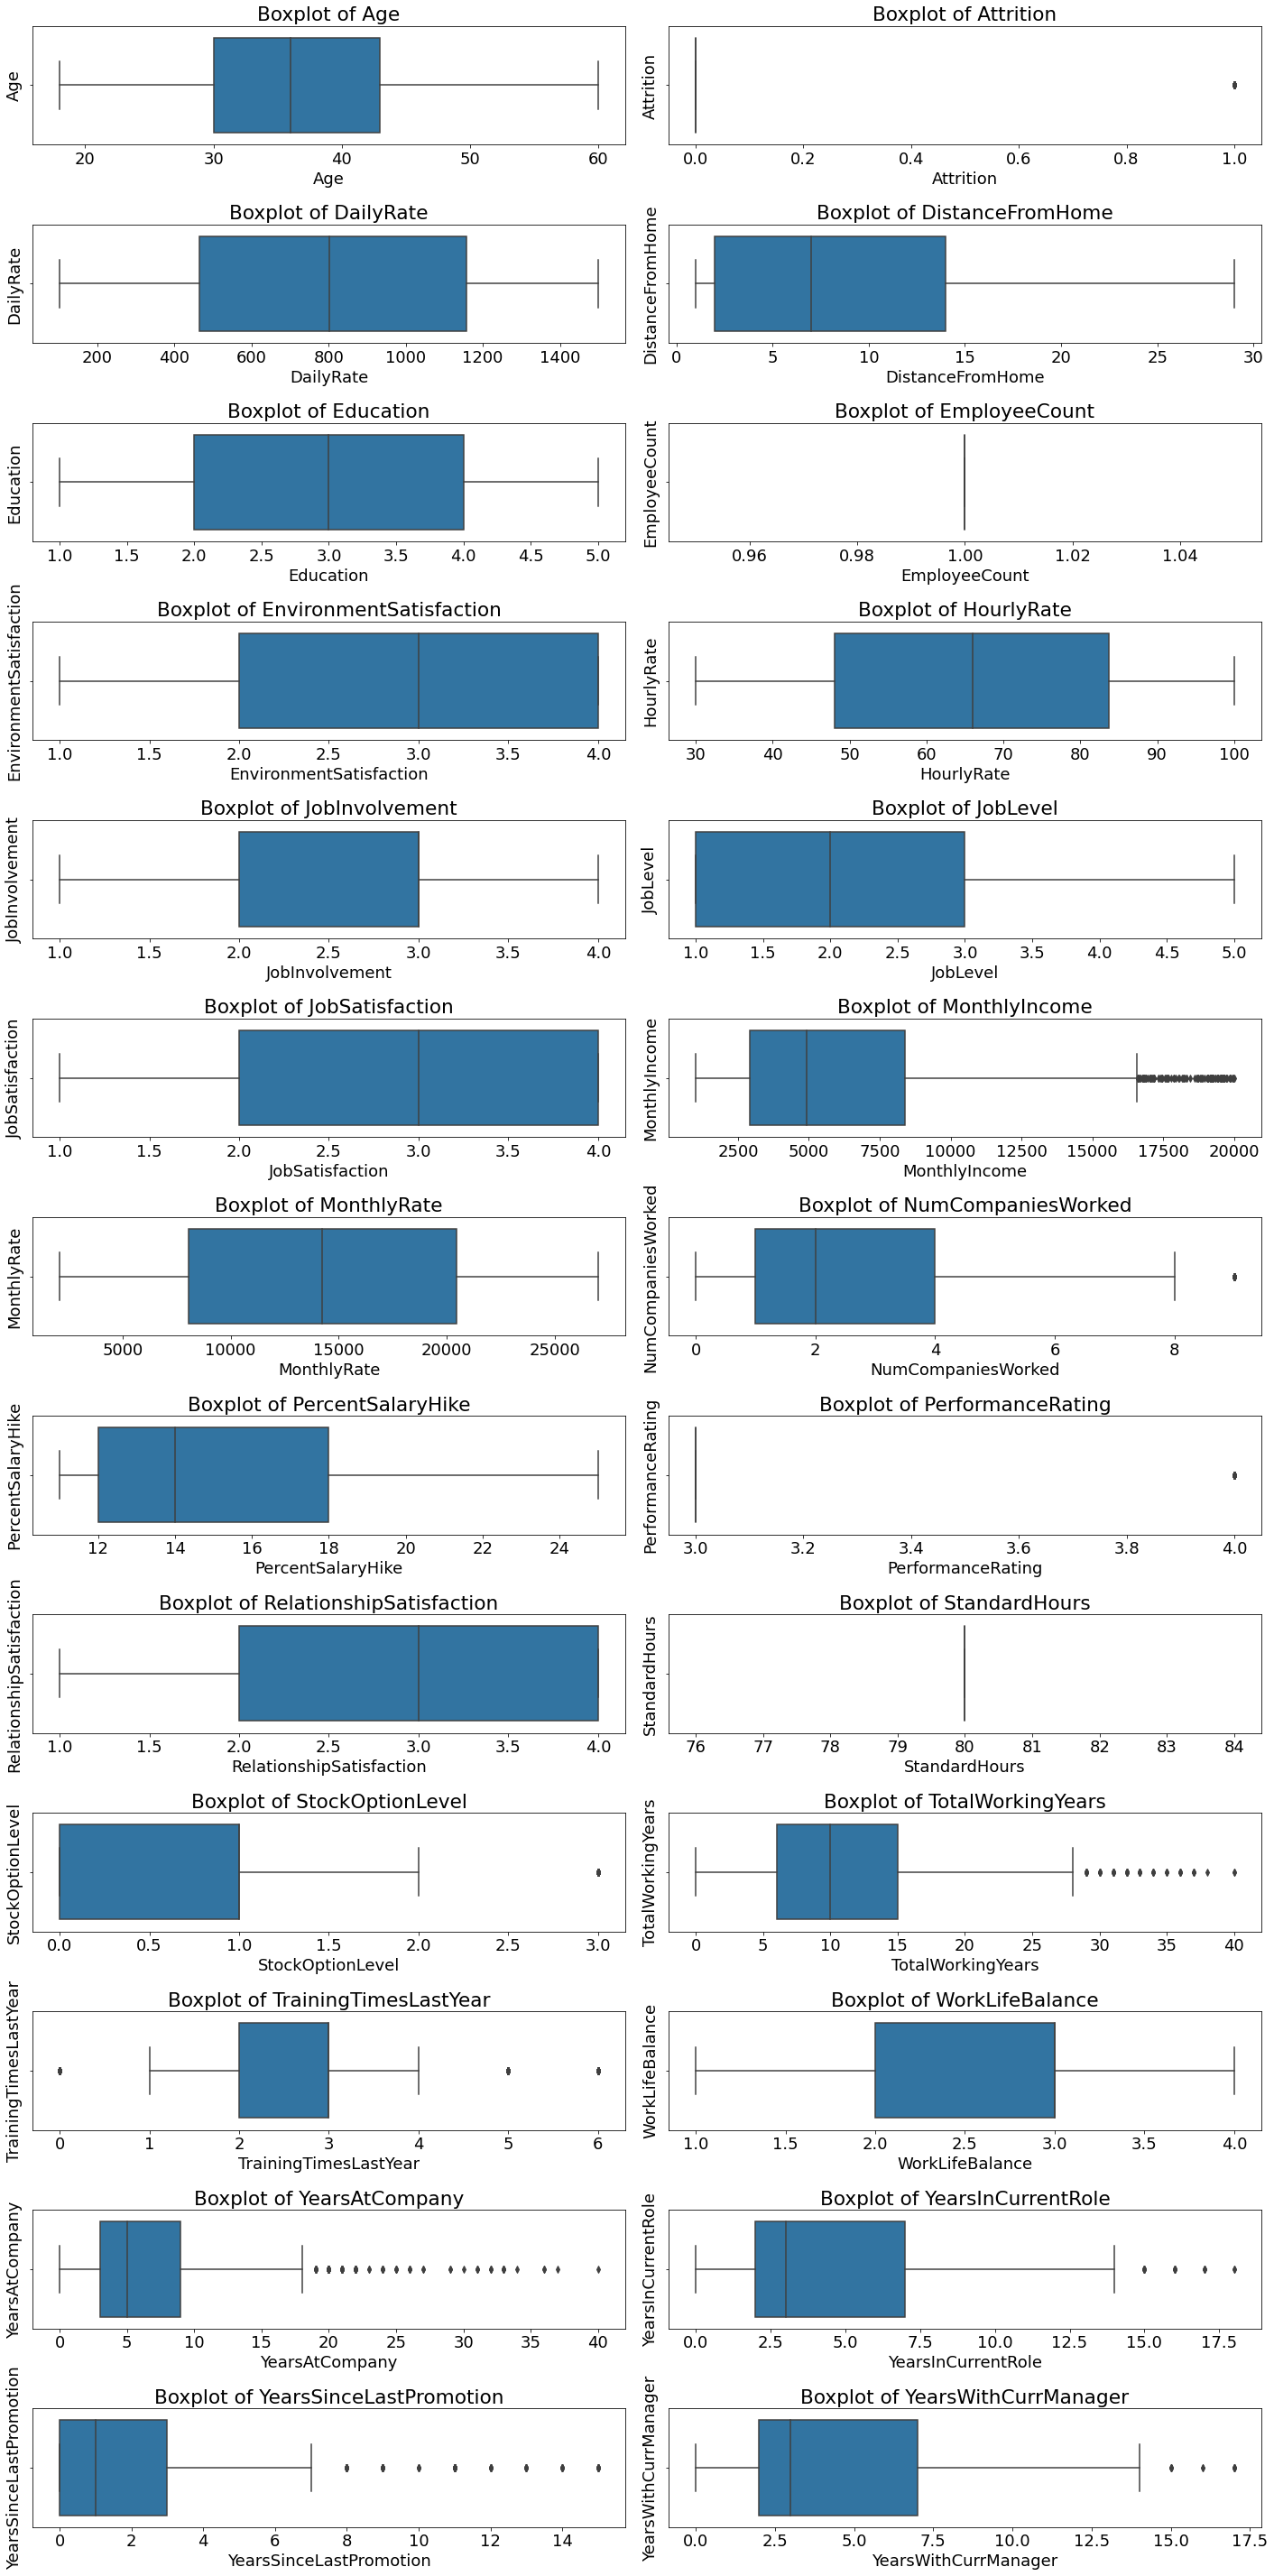

In [22]:
fig , ax = plt.subplots(13,2,figsize=(20,40))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        
        k = numerical_val[numerical_var_count]
        
        sns.boxplot(x=numerical_df[k], ax=ax[i,j])
        ax[i,j].set(xlabel=k, ylabel=k)
        ax[i, j].set(title='Boxplot of '+k)
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

Histogram for categorical data

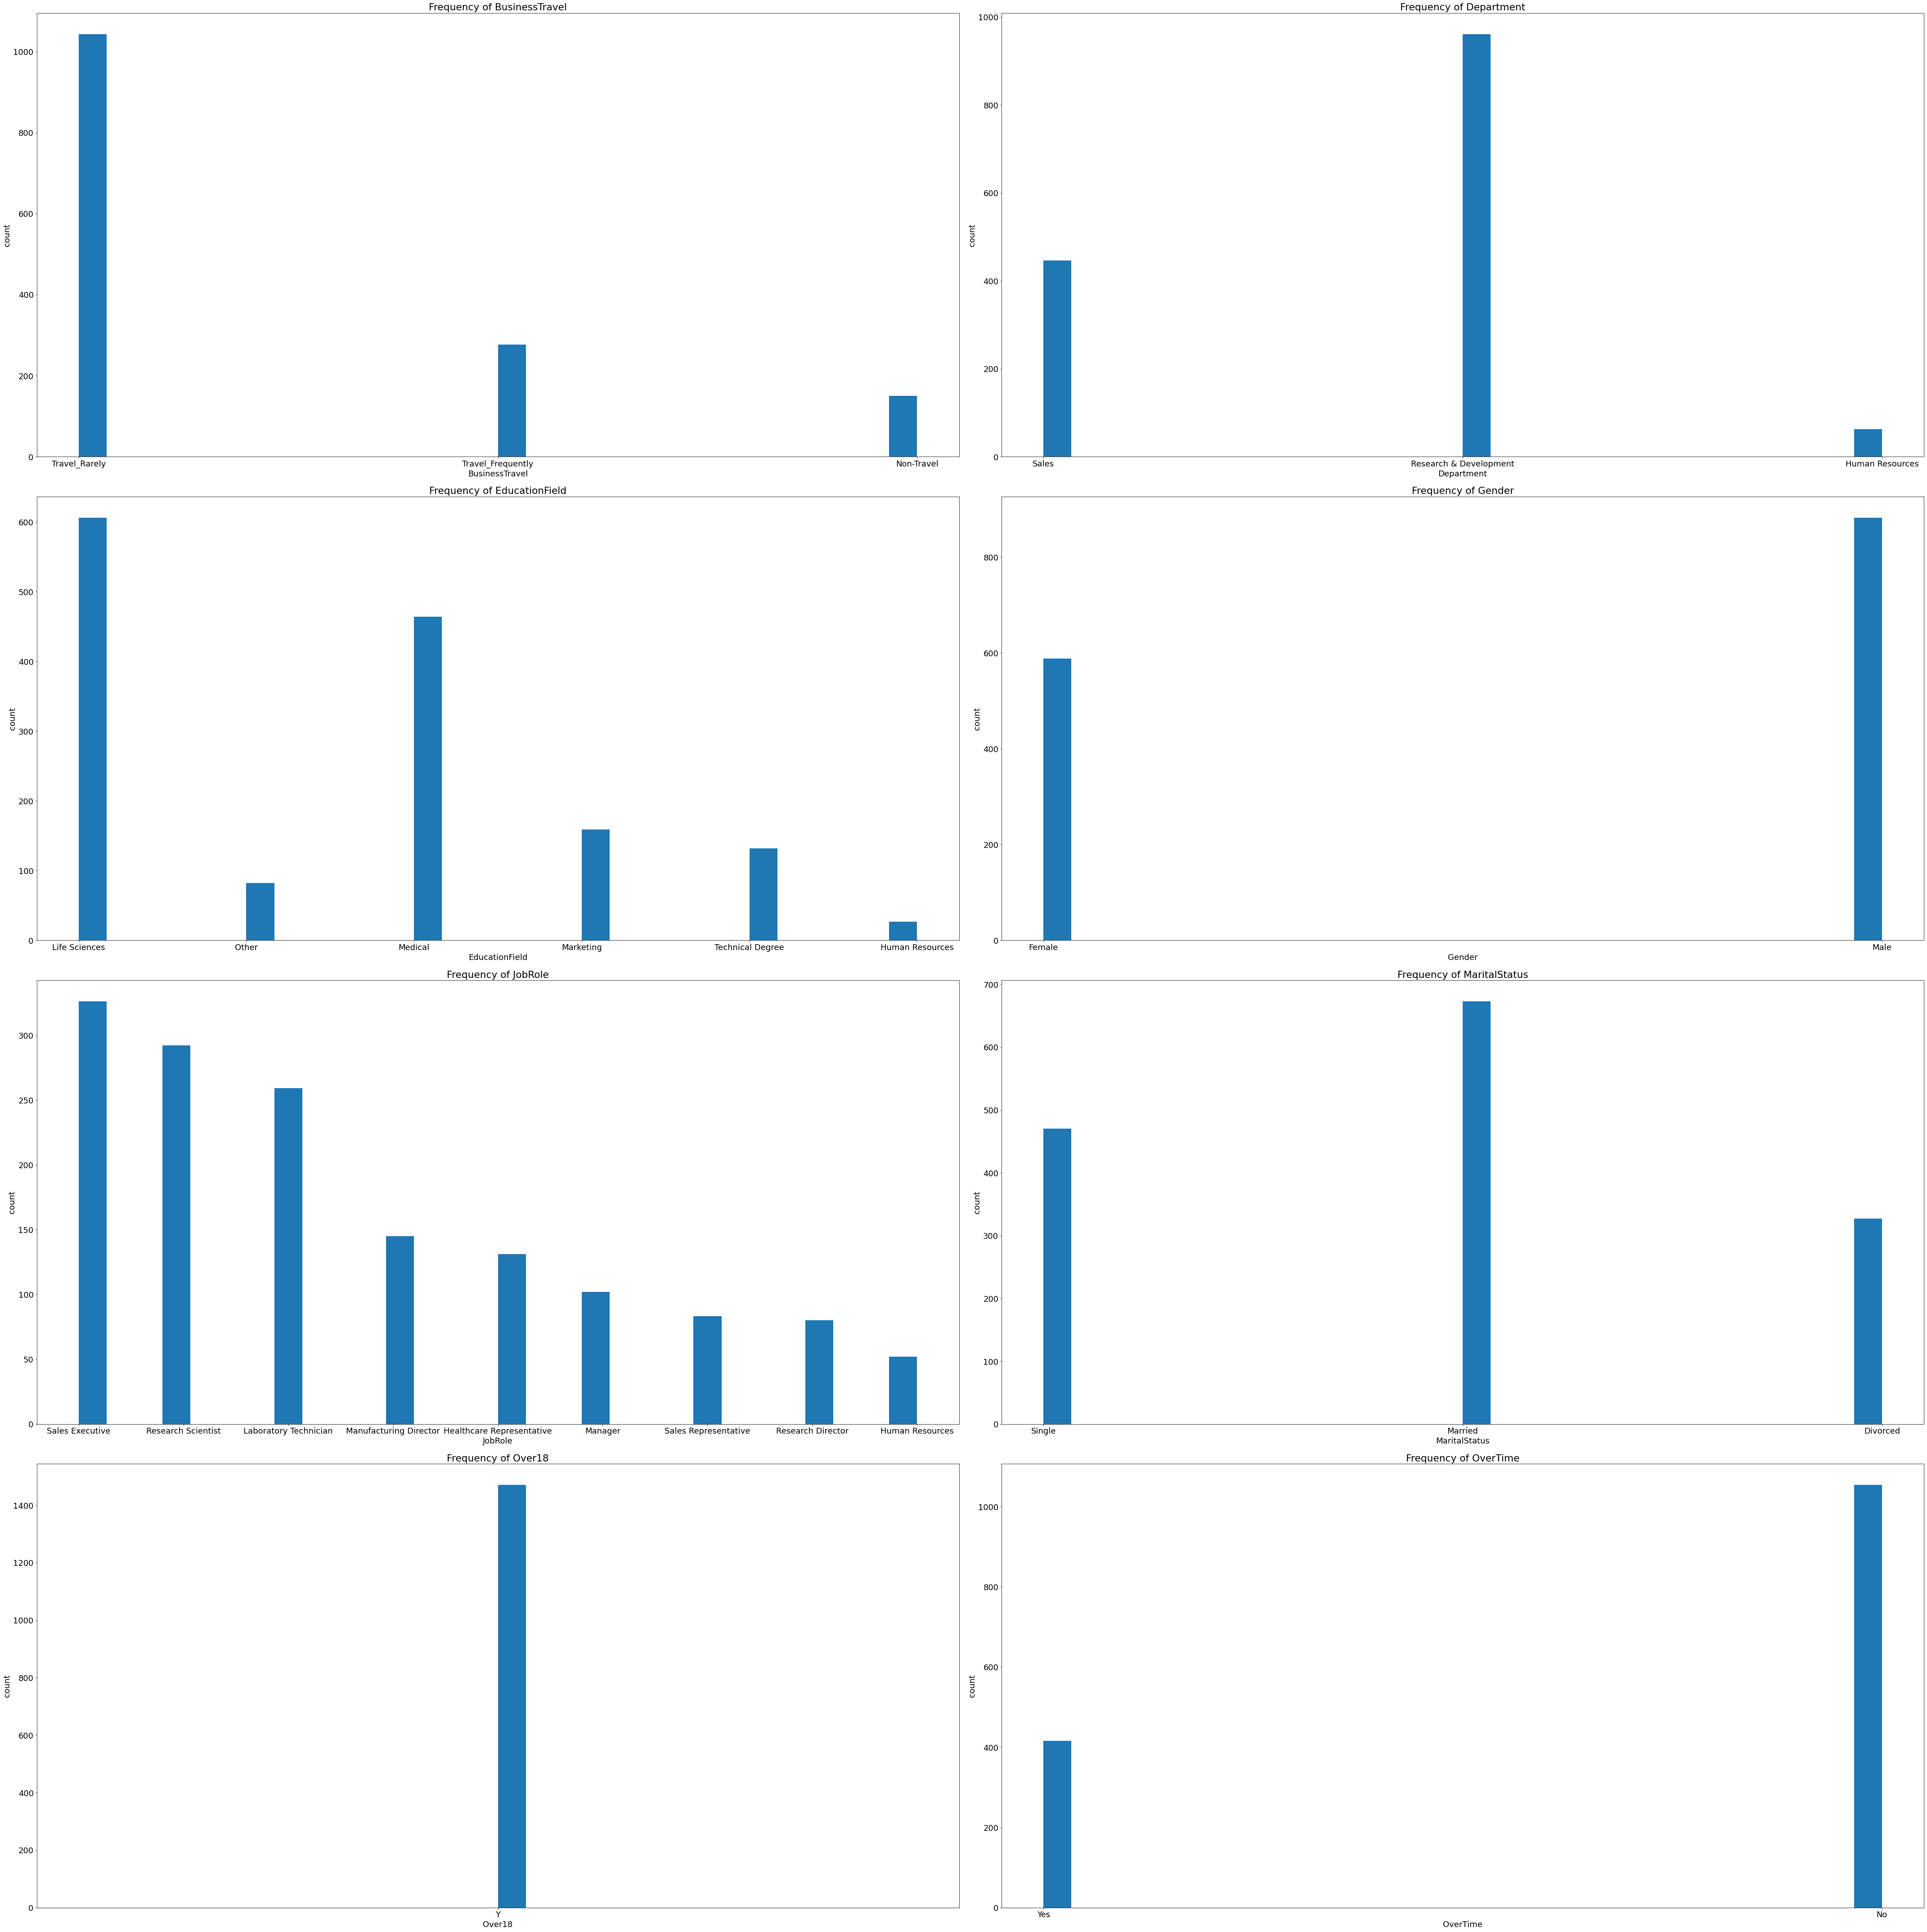

In [16]:
plt.rcParams.update({'font.size': 18})

fig , ax = plt.subplots(4,2, figsize=(60,60))

categorical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        x = categorical_val[categorical_var_count]

        ax[i, j].hist(categorical_df[x],bins=30)
        ax[i, j].set(xlabel=x,ylabel='count')
        ax[i, j].set(title='Histogram of '+x)
        categorical_var_count = categorical_var_count + 1
        
plt.tight_layout()

In conclusion, the below table summarize the variables are either incomplete, noisy, inconsistent, intentional or meaningless.

| Variable | Incomplete Data | Noisy Data | Inconsistent Data | Intentional Data | Meaningless Data |
| --- | --- | --- | --- | --- | --- |
|Age	|No	|No	|No	|No	|No|
|Attrition	|No	|No	|No	|No	|No|
|DailyRate	|No	|No	|No	|No	|No|
|DistanceFromHome	|No	|No	|No	|No	|No|
|Education	|No	|No	|No	|No	|No|
|EmployeeCount	|No	|No	|No	|**Yes**	|**Yes**|
|EnvironmentSatisfaction	|No	|No	|No	|No	|No|
|HourlyRate	|No	|No	|No	|No	|No|
|JobInvolvement	|No	|No	|No	|No	|No|
|JobLevel	|No	|No	|No	|No	|No|
|JobSatisfaction	|No	|No	|No	|No	|No|
|MonthlyIncome	|No	|**Yes**	|No	|No	|No|
|MonthlyRate	|No	|No	|No	|No	|No|
|NumCompaniesWorked	|No	|**Yes**	|No	|No	|No|
|PercentSalaryHike	|No	|No	|No	|No	|No|
|PerformanceRating	|No	|**Yes**	|No	|No	|No|
|RelationshipSatisfaction	|No	|No	|No	|No	|No|
|StandardHours	|No	|No	|No	|**Yes**	|**Yes**|
|StockOptionLevel	|No	|**Yes**	|No	|No	|No|
|TotalWorkingYears	|No	|**Yes**	|No	|No	|No|
|TrainingTimesLastYear	|No	|**Yes**	|No	|No	|No|
|WorkLifeBalance	|No	|No	|No	|No	|No|
|YearsAtCompany	|No	|**Yes**	|No	|No	|No|
|YearsInCurrentRole	|No	|**Yes**	|No	|No	|No|
|YearsSinceLastPromotion	|No	|**Yes**	|No	|No	|No|
|YearsWithCurrManager	|No	|**Yes**	|No	|No	|No|
|BusinessTravel	|No	|No	|No	|No	|No|
|Department	|No	|No	|No	|No	|No|
|EducationField	|No	|No	|No	|No	|No|
|Gender	|No	|No	|No	|No	|No|
|JobRole	|No	|No	|No	|No	|No|
|MaritalStatus	|No	|No	|No	|No	|No|
|Over18	|No	|No	|No	|**Yes**	|**Yes**|
|OverTime	|No	|No	|No	|No	|No|


#### <a style="color:blue;">Data visualization</a>
1. Attrition value 
- This is an imbalanced dataset. 

In [6]:
dataset['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

2. Numerical Histogram
- To explore the numerical variable distributions. 
- Dataset are seperated into numerical and categorical for better visualization. 
- It can be observed that:
    * Churner are more likely to be younger, low job level with low monthly income, and stay far away from company. 
    * They are more likely not satisfied to the job but shorter working hours. 
    * They have a shorter tenure in company, with manager and current role. 

In [6]:
#Target 
target = ['Attrition']

#Seperate the data into Numerical and Categorical Data
numerical_val = [i for i in dataset.columns if dataset[i].dtypes == 'int64']
categorical_val = [i for i in dataset.columns if dataset[i].dtypes == 'object']

#Numerical and Categorical data in dataframe
numerical_df = dataset[numerical_val]
categorical_df = dataset[categorical_val] #addin attrition value 
categorical_df.insert(0, 'Attrition', dataset['Attrition'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

IndexError: list index out of range

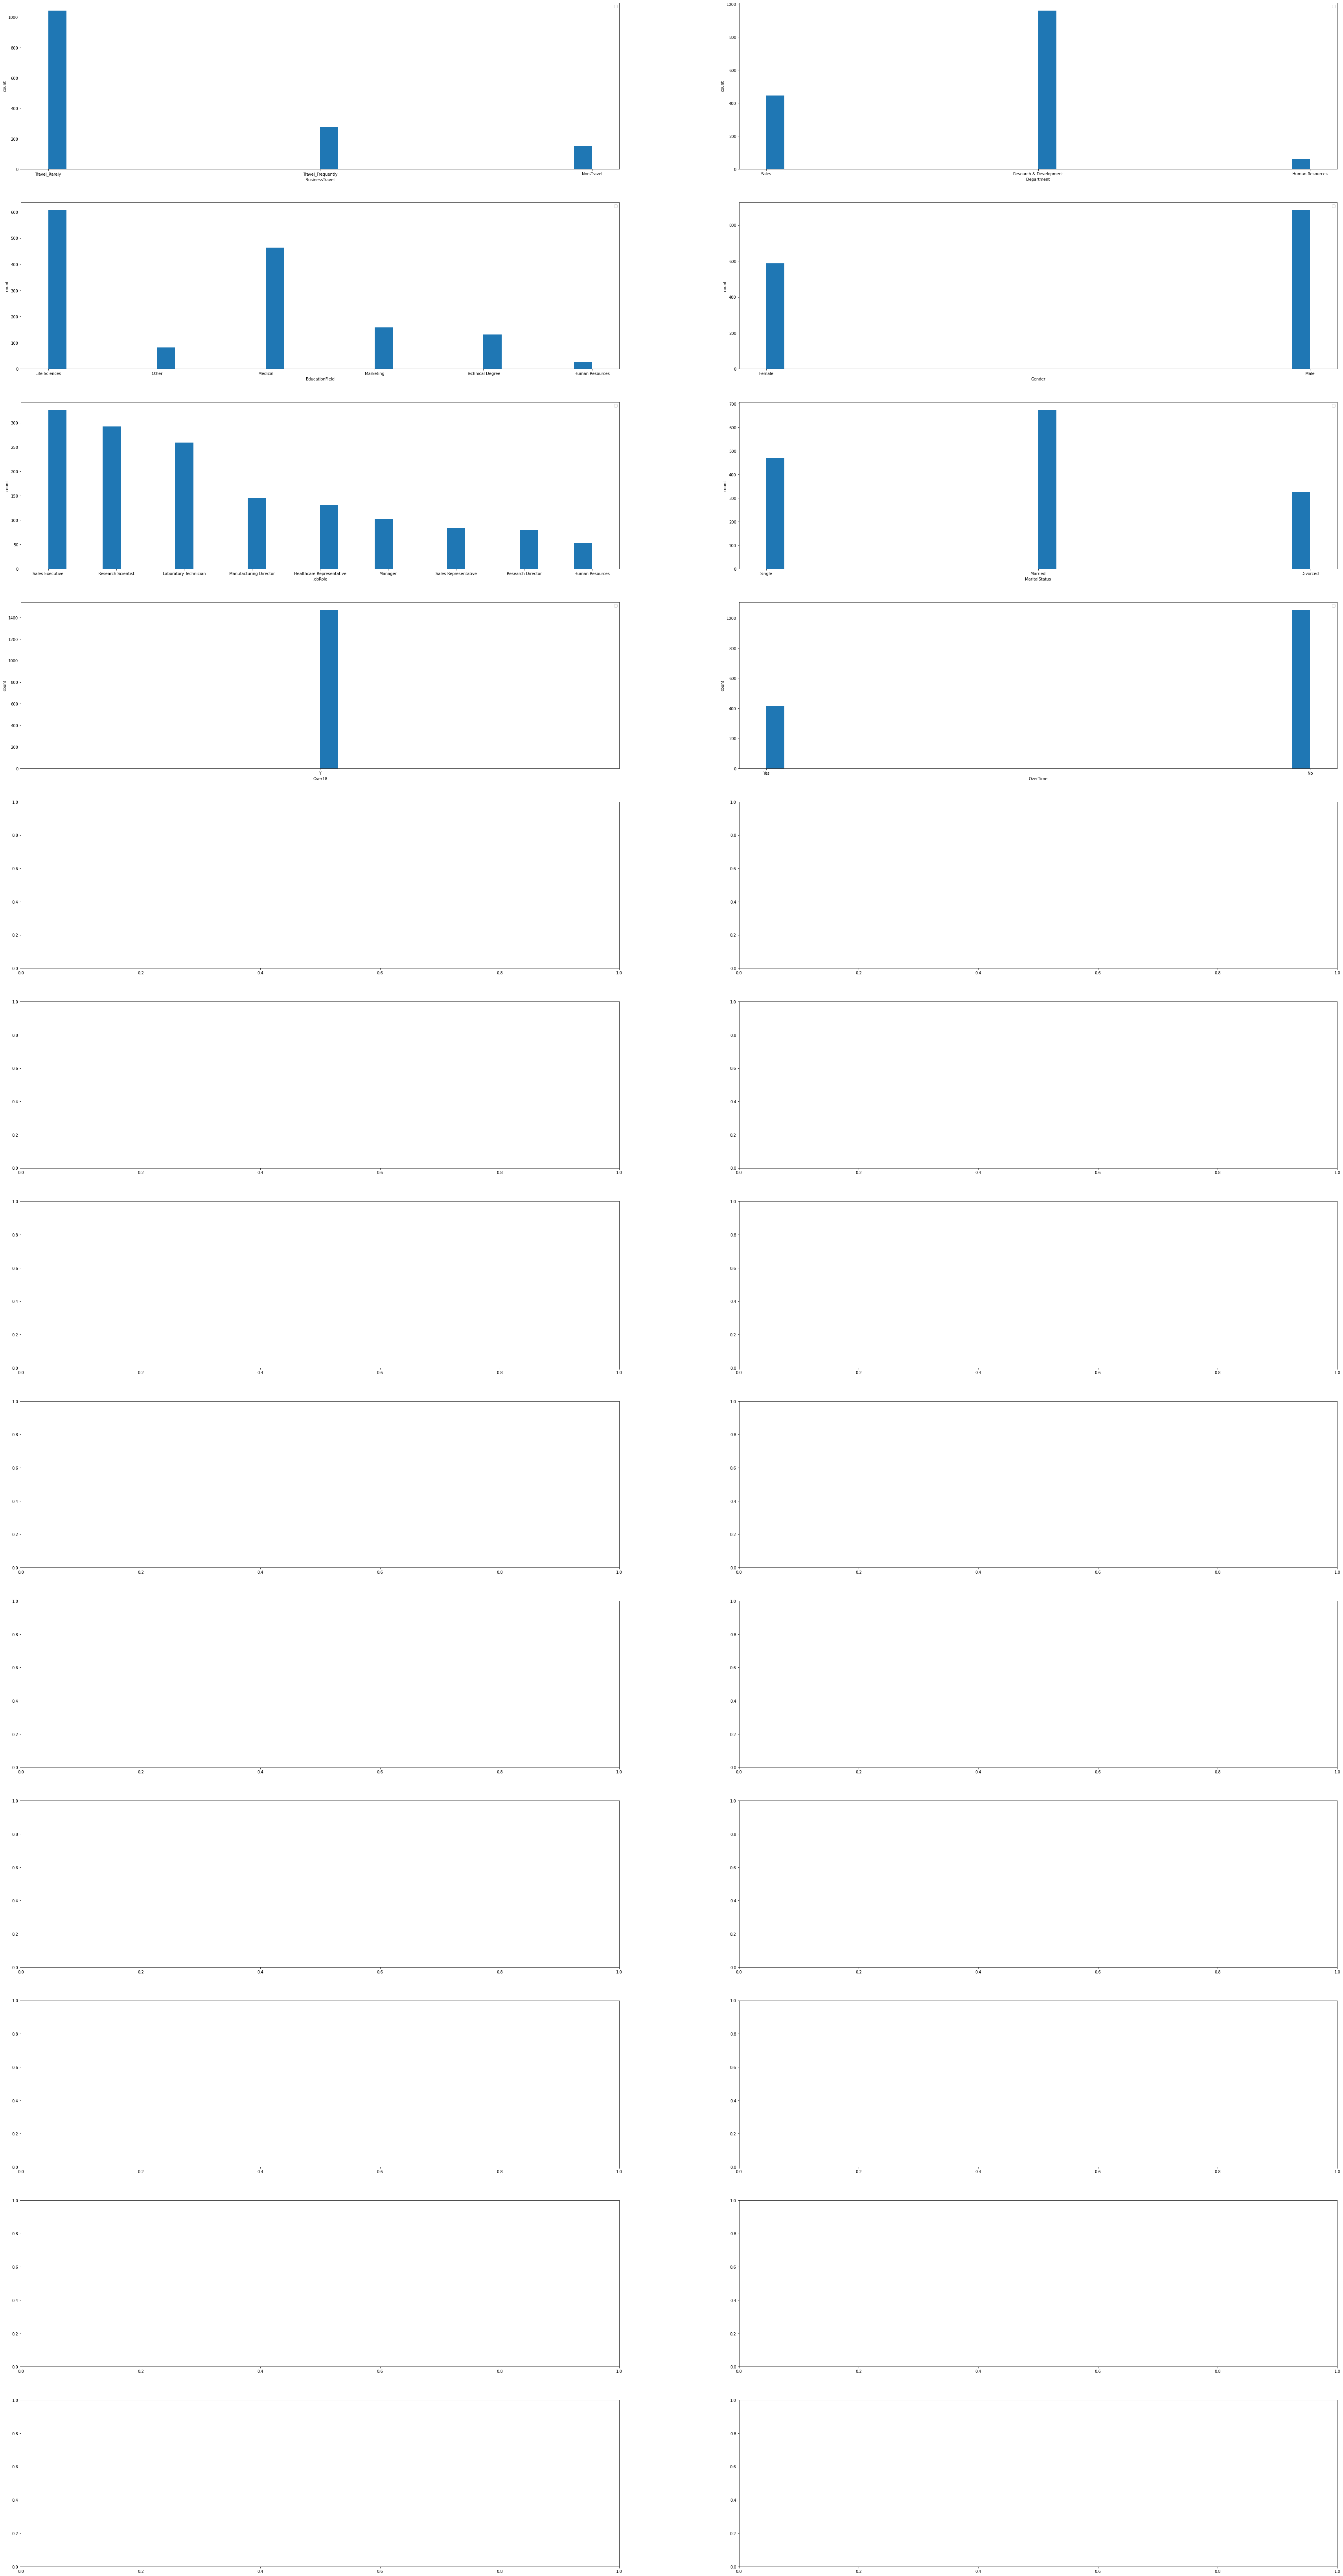

In [9]:
fig , ax = plt.subplots(13,2, figsize=(60,120))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        x = numerical_val[numerical_var_count]

        ax[i, j].hist(numerical_df[numerical_df[target[0]]==1][x],label='Churn',bins=30)
        ax[i, j].hist(numerical_df[numerical_df[target[0]]==0][x],label='Non-Churn',bins=30)
        ax[i, j].set(xlabel=x,ylabel='count')
        ax[i, j].legend()
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

3. Numerical Boxplot
- To explore the numerical variable outliers. 
- It can be observed that there are outliers in Age, JobLevel, NumberCompaniesWorked, PercentSalaryHike, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager          

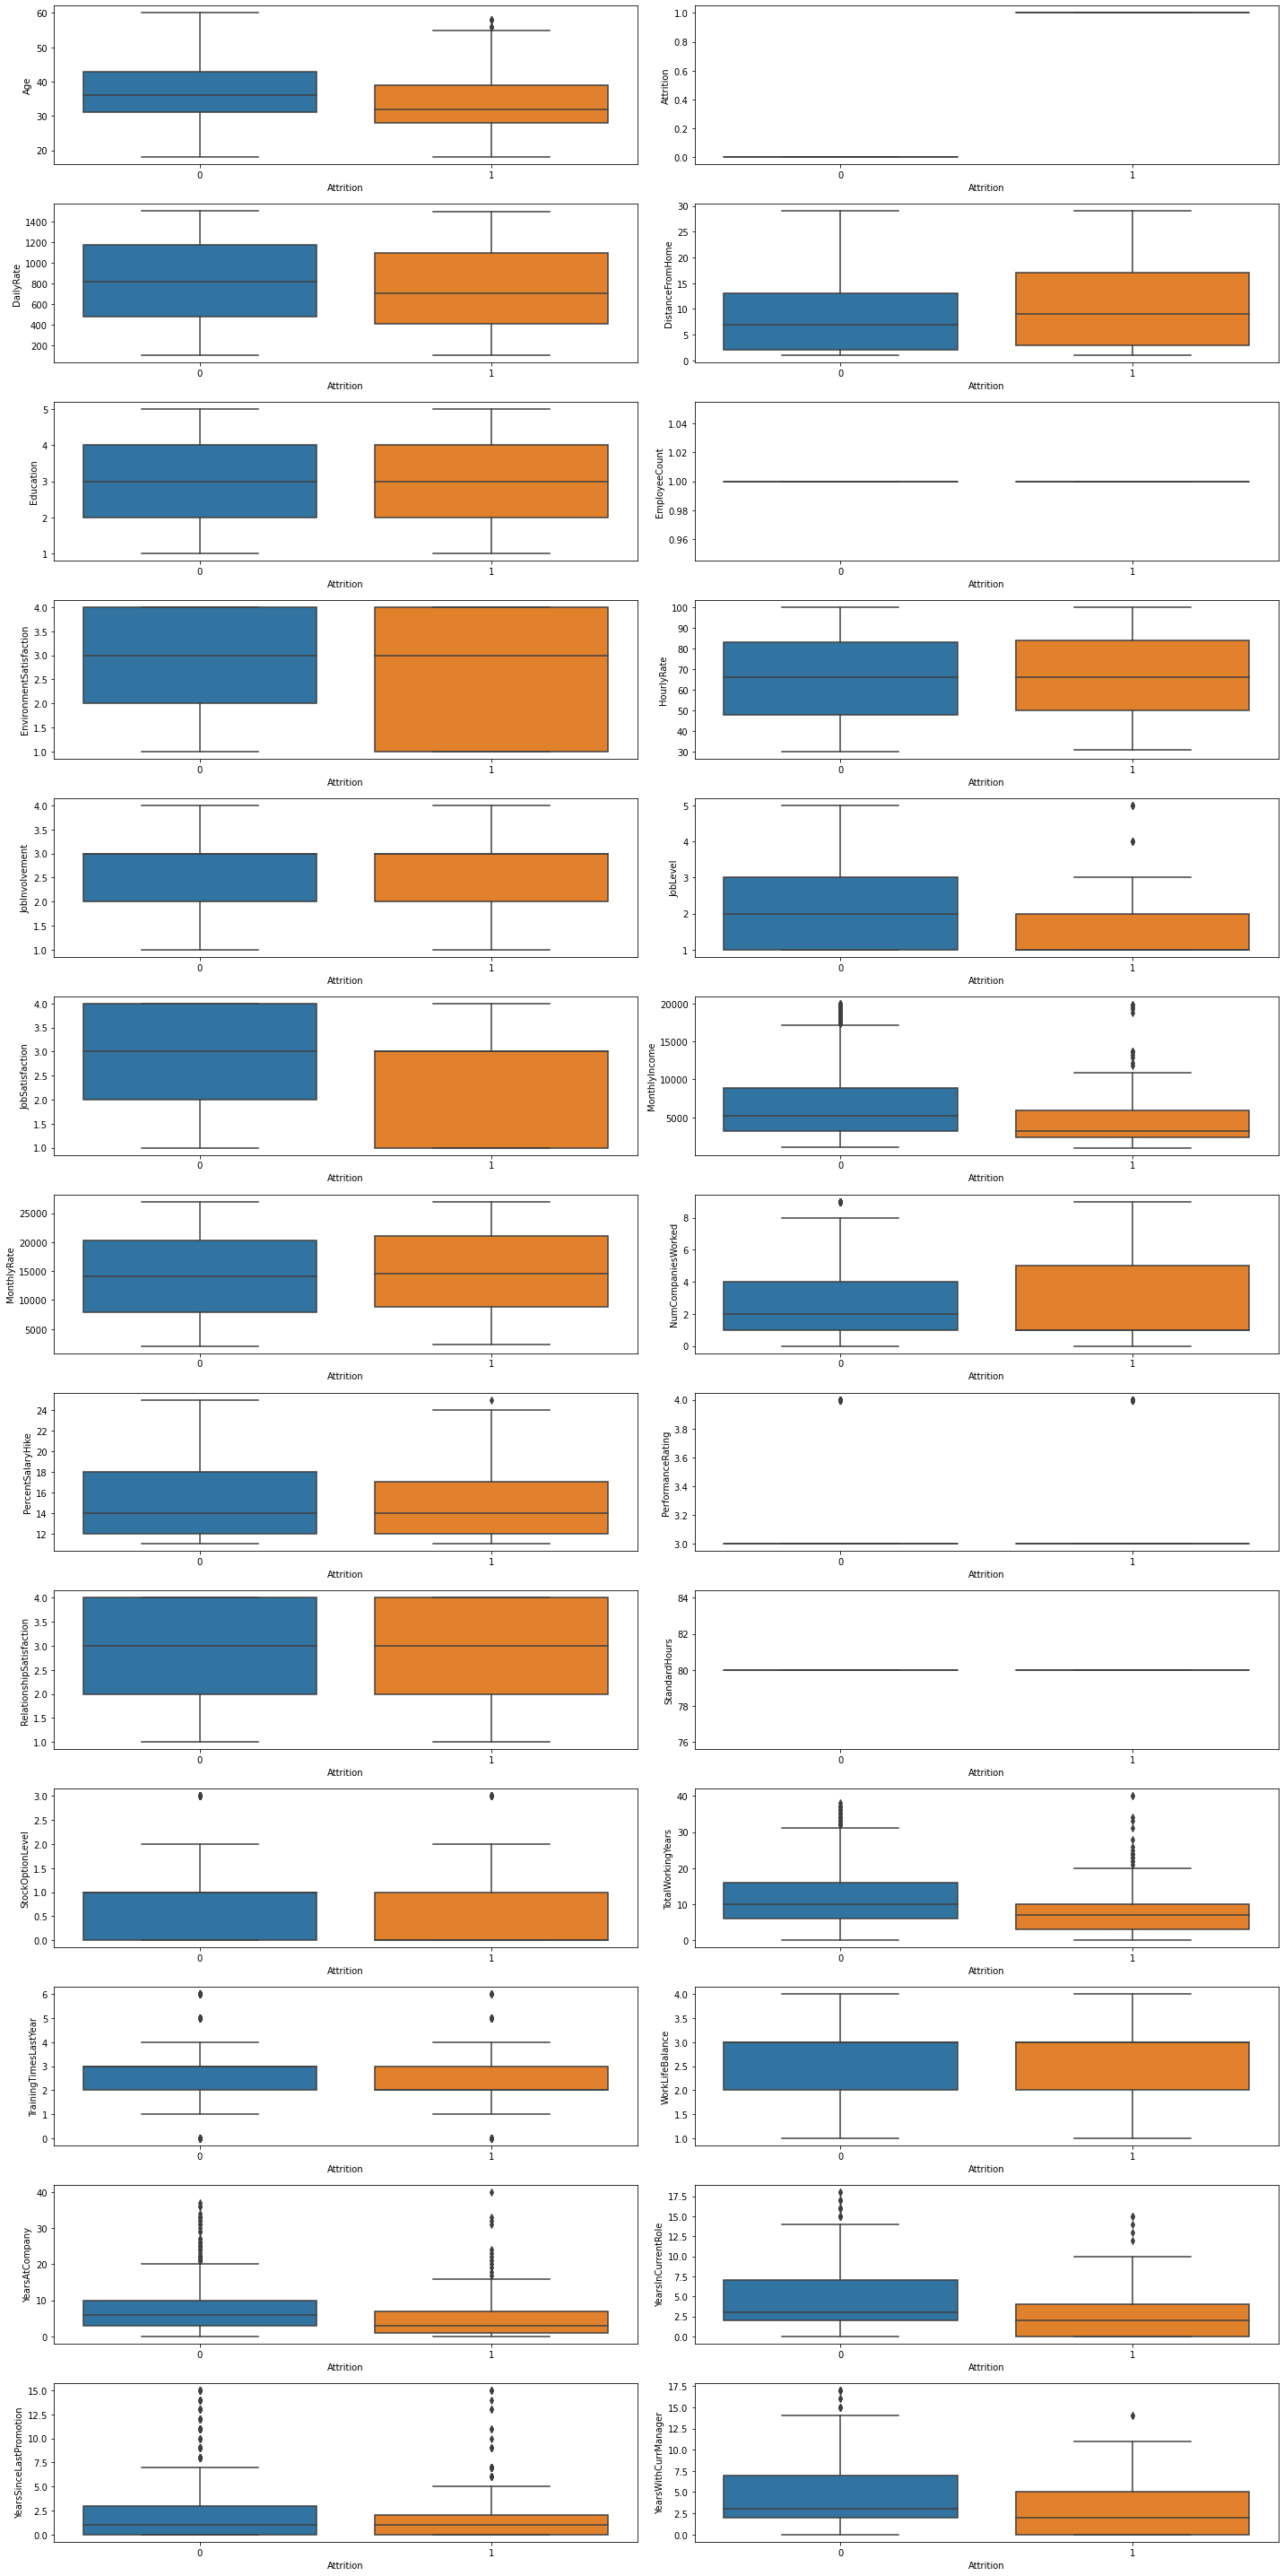

In [9]:
fig , ax = plt.subplots(13,2,figsize=(20,40))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        
        k = numerical_val[numerical_var_count]
        
        sns.boxplot(x=numerical_df['Attrition'], y=numerical_df[k], ax=ax[i,j])
        ax[i,j].set(xlabel='Attrition', ylabel=k)
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

4. Categorical Barplot 
- To explore the categorical variable distribution. 
- It can be observed that:
    * Majority of the employee rarely travel and no overtime. 
    * Most of the employee are from researtch & development department. The employees are mostly come from life sciences, followed by other, medical then marketing, technical degree and human resource. 
    * Most of the employee are male. 
    * Minority of the employee are still single. 

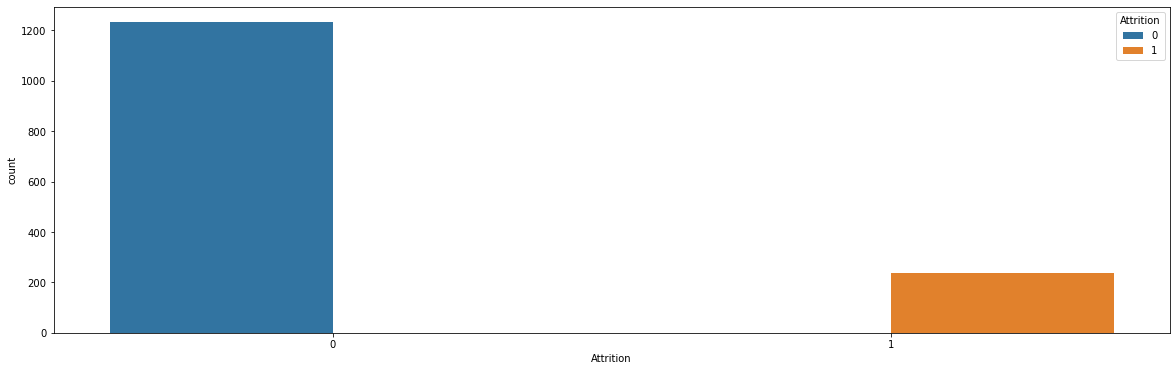

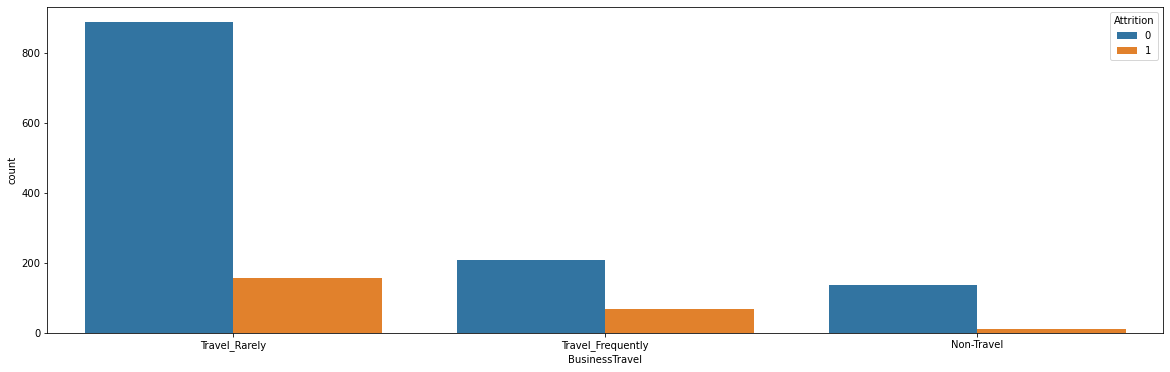

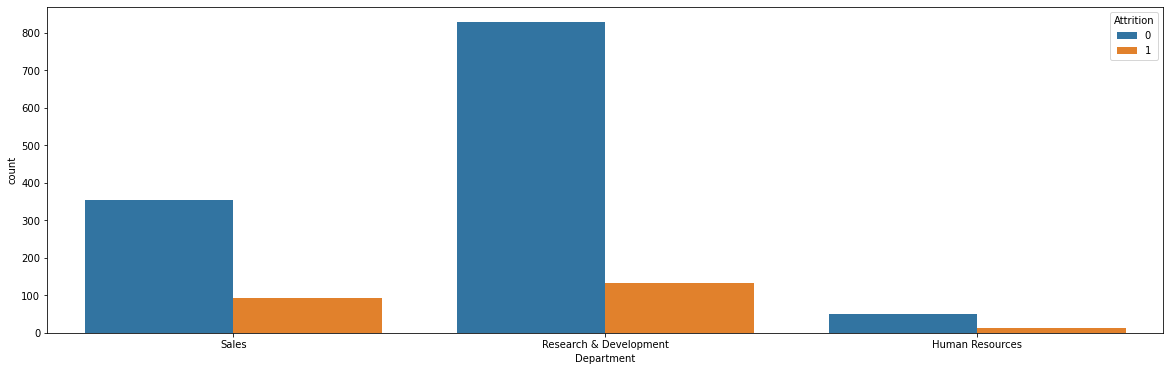

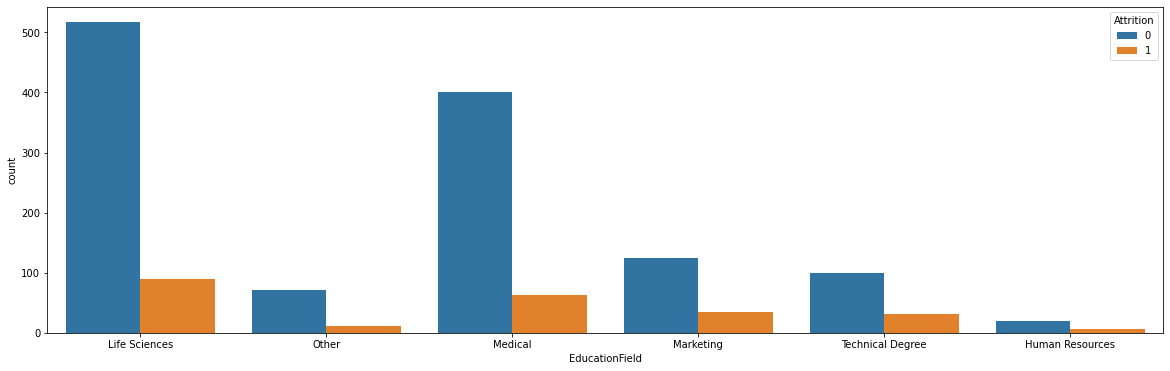

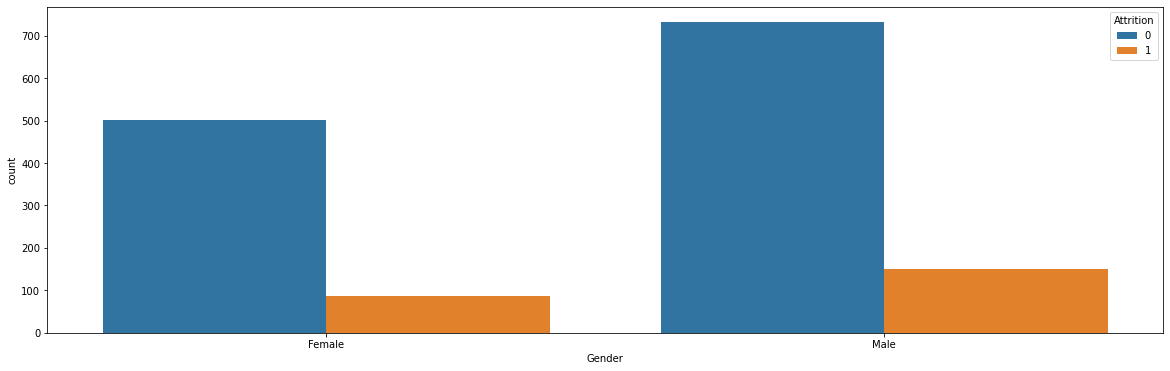

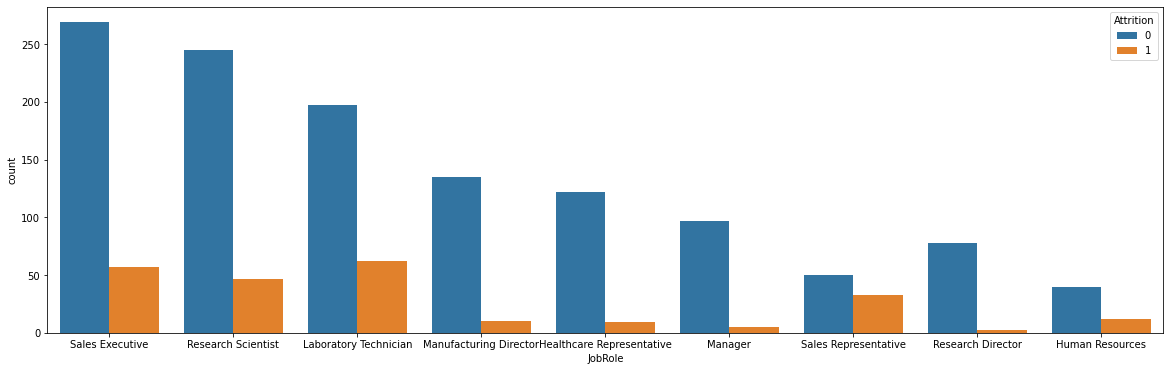

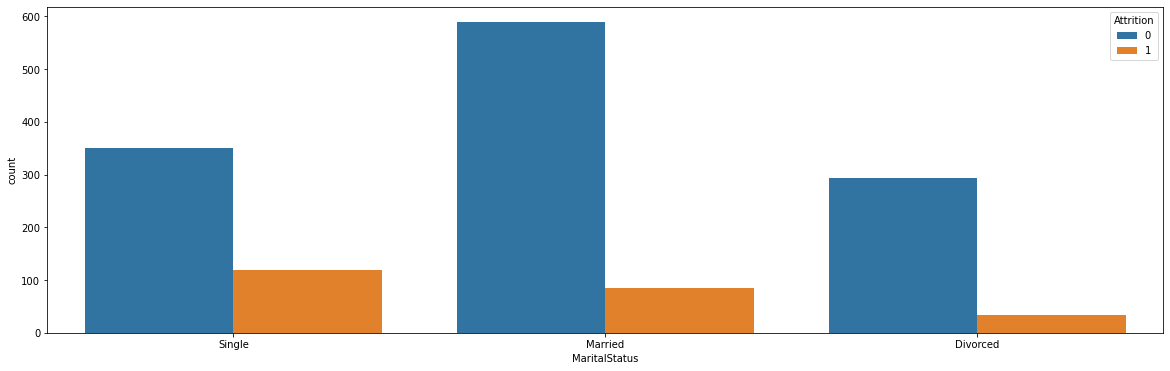

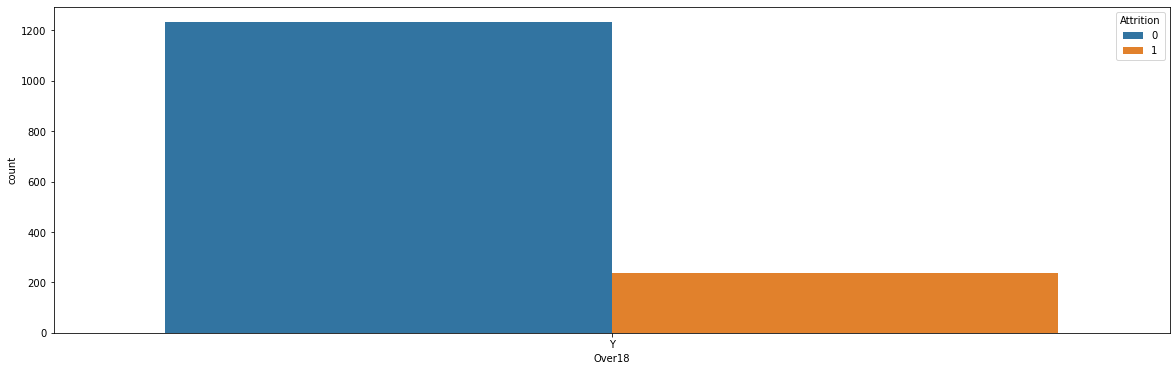

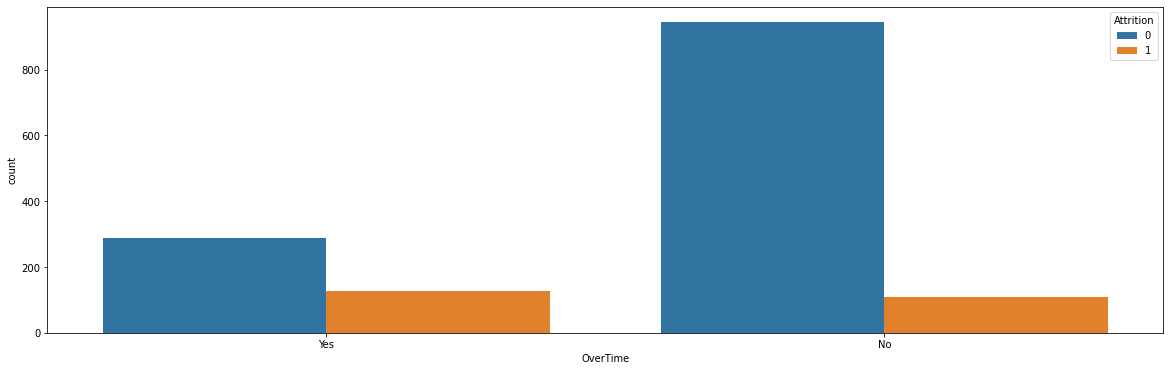

In [10]:
for i, col in enumerate(categorical_df):
    plt.figure(figsize=(20,6))
    sns.countplot(x=col, hue="Attrition", data=categorical_df)

### Data Pre-processing
#### Data Cleaning

#### <a style="color:blue;">Missing value</a>
- There is no missing value in the dataset.

In [11]:
#Missing values in dataset
print ("\nMissing values: ", dataset.isnull().sum().values.sum())

#Missing values details
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_values = pd.DataFrame({'column_name': dataset.columns,'percent_missing': percent_missing})
missing_values.sort_values('percent_missing', ascending = False, inplace=True)
print ("\nMissing values for each variables: ", missing_values)


Missing values:  0

Missing values for each variables:                                         column_name  percent_missing
Age                                            Age              0.0
StandardHours                        StandardHours              0.0
NumCompaniesWorked              NumCompaniesWorked              0.0
Over18                                      Over18              0.0
OverTime                                  OverTime              0.0
PercentSalaryHike                PercentSalaryHike              0.0
PerformanceRating                PerformanceRating              0.0
RelationshipSatisfaction  RelationshipSatisfaction              0.0
StockOptionLevel                  StockOptionLevel              0.0
Attrition                                Attrition              0.0
TotalWorkingYears                TotalWorkingYears              0.0
TrainingTimesLastYear        TrainingTimesLastYear              0.0
WorkLifeBalance                    WorkLifeBalance         

#### <a style="color:blue;">Meaningless value</a>
- To check and drop unecessary columns: Over18, EmployeeCount, StandardHours
- These columns displayed the same value for each records.

Definition:
* EmployeeNumber indicates the identity of employee in the company.
* Over18 indicates the age of employee in the company must be over 18 years old. 
* EmployeeCount indicates the count of unique employee in the company. 
* StandardHours indicates the standard working hours (80 hours) of employee in the company.

In [12]:
dataset.drop(['Over18','EmployeeCount','StandardHours'],axis='columns',inplace=True)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### <a style="color:blue;">Convert OverTime to numerical label - Yes indicates 1 and No indicates 0</a>

In [13]:
dataset.OverTime.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### Data Integration - Correlation

#### <a style="color:blue;">Correlation Matrix Heatmap</a>
- Numerical variables only
- It can be observed that: 
    * The higher the job level, the higher the monthly income. 
    * The higher the job level, the longer the total working years. 
    * The longer the total working years, the higher the monthly income.
    * The higher the performance rating , the higher the percent salary hike.
    * The longer the years at company, the longer the years in current role. 
    * The longer the years at company, the longer the years with current manager. 
    * The longer the years with current manager, the longer the years in current role.  

<AxesSubplot:>

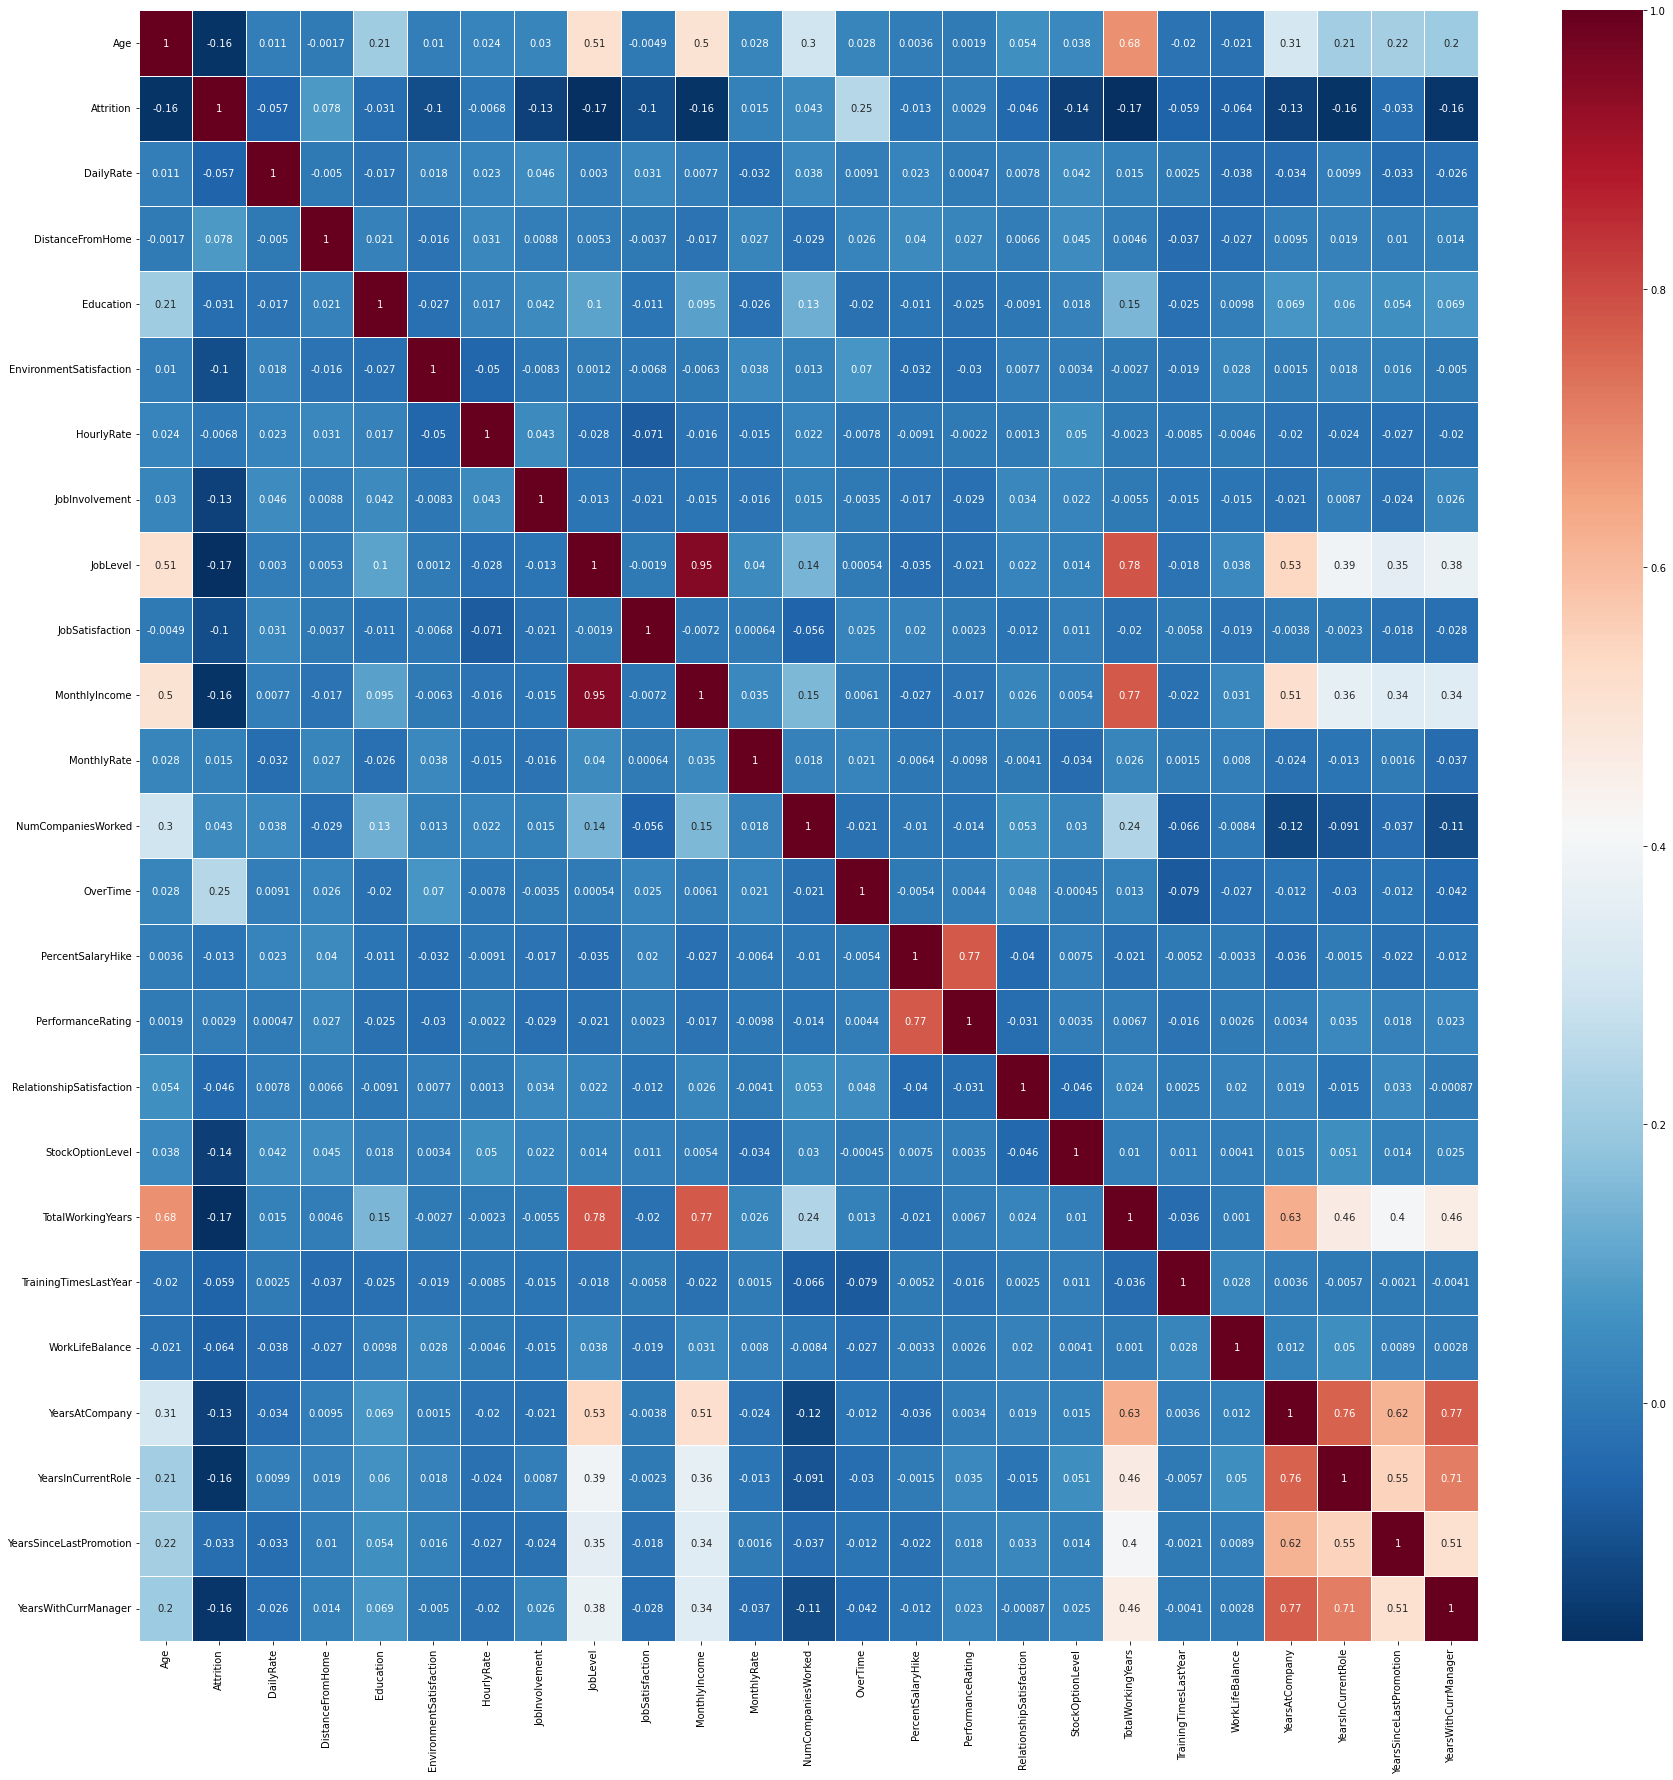

In [14]:
#Correlation Matrix 
#df_numerics_only = dataset.select_dtypes(include=np.number)
#df_numerics_only.corr()

#Correlation Matrix Heatmap
pearsoncorr = dataset.corr(method='pearson')
pearsoncorr = pearsoncorr[((pearsoncorr >= .5) | (pearsoncorr <= -.5)) & (pearsoncorr !=1.000)]
plt.figure(figsize=(30,30))
sns.heatmap(dataset.corr(method='pearson'), 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#### <a style="color:blue;">Correlation Matrix Heatmap (Correlation > +-0.8)</a>
- To highlight the pairs of numerical variables which having correlation coefficient of more than 0.8 or -0.8. 

Correlation > 0.8: 


JobLevel         0.9503
MonthlyIncome    0.9503
dtype: float64

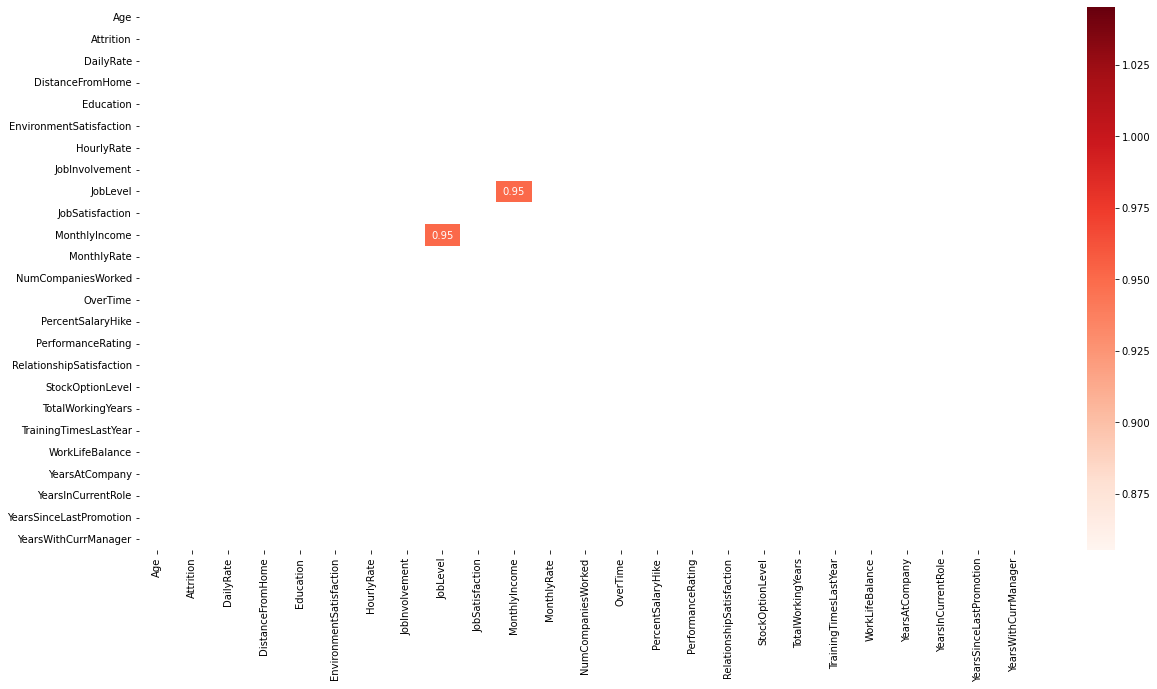

In [15]:
corr = dataset.corr().abs()
corr[corr == 1] = 0
corr_cols = corr.max().sort_values(ascending=False)
print("Correlation > 0.8: ")
display(corr_cols[corr_cols > 0.8])

dfCorr = dataset.corr()
filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.8)) & (dfCorr !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [16]:
#### <a style="color:blue;">ScatterPlot (Correlation > +-0.7)</a>
#- To highlight the pairs of numerical variables which having correlation coefficient of more than 0.7 or -0.7. 
#g = sns.PairGrid(dataset, vars=['MonthlyIncome', 'YearsWithCurrManager', 'JobLevel','TotalWorkingYears',
#                                'PerformanceRating','PercentSalaryHike','YearsAtCompany','YearsInCurrentRole'
#                                ],hue='Attrition', palette='RdBu_r')
#g.map(plt.scatter, alpha=0.8)
#g.add_legend();

#### Data Reduction - Principle Component Analysis (PCA)
- Principal Component Analysis (PCA) is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

#### <a style="color:blue;">Dataset are seperated into numerical and categorical.</a>

In [17]:
numerical = [i for i in dataset.columns if dataset[i].dtypes == 'int64' and i != 'Attrition']
categorical = [i for i in dataset.columns if dataset[i].dtypes == 'object']

#### <a style="color:blue;">Label encoding is applied to categorical variable.</a>
- Not using one hot encoding because the categorical are not ranked in order.

In [18]:
dataset_cat_encoded = pd.get_dummies(dataset[categorical], columns= [i for i in dataset[categorical].columns if dataset[categorical][i].dtypes=='object'],drop_first=False)

#### <a style="color:blue;">Merge numerical and categorical.</a>

In [19]:
dataset_encoded = pd.merge(dataset[numerical], dataset_cat_encoded, left_index=True, right_index=True, how="left")
dataset_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
2,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
4,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
5,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
7,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0


#### <a style="color:blue;">Feature Scaling - Standardization</a>

In [20]:
scaler = StandardScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset_encoded))
dataset_scaled.columns = dataset_encoded.columns.values
dataset_scaled.index = dataset_encoded.index.values
dataset_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650
2,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
4,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650
5,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
7,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565


#### <a style="color:blue;"> Fit standardized data into PCA.</a>

In [21]:
pca = PCA(n_components = 25) 
pca_fit = pca.fit_transform(dataset_scaled) 

#### <a style="color:blue;">Explained Variance Ratio</a>
- The percentage of variance that is attributed by each of the selected components. Ideally, number of components to include in the model by adding the explained variance ratio of each component till around 0.8 or 80% to avoid overfitting.
- Based on the cumulative variance plot, the optimal number of components is 25. Meaning, 25 features are required to explain the model correctly. Data dimentionality could be reduced from 50 to 25. 

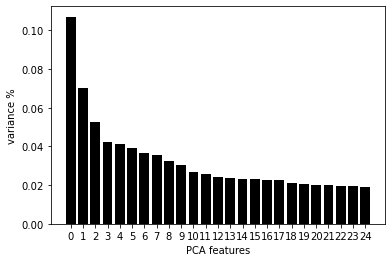

In [22]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_,color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features) 
plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

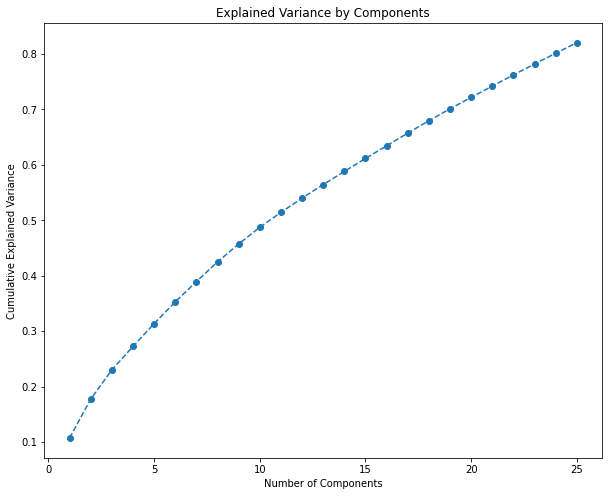

In [23]:
#Decide how many feature to keep based on the cumulative variance plot. Optimal 25 variables or variance >80%
plt.figure(figsize=(10, 8))
plt.plot(range(1,26), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance' )

#### <a style="color:blue;">Important features based on PCA</a>
- Principal component of 1st, 2nd, 5th, 6th, 7th: 
    * Weak correlation with respective original variables. 
    * These criterias do not vary together. If one increases, then the remaining ones remain unchange.

- Principal component of 3rd: Correlated with Job role and Department (HR).
- Principal component of 4th, 10th: Correlated with Marital status (single, divorced).
- Principal component of 8th: Correlated with increasing Percent salary hike and performance rating. 
- Principal component of 9th: Correlated with Education field (Medical).

In [24]:
pca = PCA(n_components = 25) 
pca.fit(dataset_scaled) 
df_pca = pca.transform(dataset_scaled)

#Get the most important features, to understand which features are important for that component 
def create_importance_dataframe(pca, Y):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)
    
    # Assign columns
    importance_df.columns = Y.columns
    
    # Change to absolute values
    # importance_df =importance_df.apply(np.abs)
    
    # Transpose
    importance_df=importance_df.transpose()
    
    # Change column names again
    ## First get number of pcs
    num_pcs = importance_df.shape[1]
    
    ## Generate the new column names
    new_columns = [i for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns = new_columns

    # Return importance df
    return importance_df
   
# Call function to create importance df
importance_df = create_importance_dataframe(pca, dataset_scaled)

# Show first few rows
display(importance_df.head())

# Top 10 for PC 1 - PC 20
for i in importance_df.columns:
    top_10_features = importance_df[i].sort_values(ascending = False)[:10]
    print(), print(f'pc{i}_top_10_featuress are \n'.format(i=i))
    display(top_10_features)

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
Age,0.258199,-0.065039,0.046969,0.009739,-0.156461,0.118512,0.165538,0.058420,-0.051345,-0.043509,...,0.003385,-0.092459,-0.061255,-0.040529,-0.066509,0.020325,-0.164377,0.024496,0.058123,0.086151
DailyRate,-0.002080,-0.020961,-0.012306,-0.076110,-0.071494,-0.022671,0.043524,0.007863,0.010603,-0.019124,...,-0.086311,-0.255709,0.201388,-0.461619,0.365960,0.226210,0.136382,-0.128901,-0.187103,-0.101879
DistanceFromHome,0.003015,0.010206,-0.016442,-0.057584,0.008019,-0.060748,0.006436,0.039487,0.013615,-0.021669,...,-0.173822,-0.139102,-0.021655,0.447534,0.069601,0.154244,0.293888,-0.333982,0.352501,0.164048
Education,0.070858,0.006353,0.017172,0.011435,-0.057332,0.059211,0.067707,-0.002936,-0.111290,0.043434,...,0.038302,0.114523,0.047421,-0.015962,-0.197932,-0.092541,-0.034008,-0.081378,0.114249,0.332449
EnvironmentSatisfaction,-0.000189,-0.015453,-0.009662,0.011847,-0.001887,0.012612,-0.010298,-0.054424,0.026260,0.055232,...,0.016900,-0.137928,-0.187138,-0.133423,0.123688,-0.166589,-0.192350,-0.063522,-0.284157,0.125364



pc1_top_10_featuress are 



JobLevel                     0.380489
MonthlyIncome                0.374056
TotalWorkingYears            0.373970
YearsAtCompany               0.341670
YearsInCurrentRole           0.288291
YearsWithCurrManager         0.281425
Age                          0.258199
YearsSinceLastPromotion      0.254822
JobRole_Manager              0.229763
JobRole_Research Director    0.150387
Name: 1, dtype: float64


pc2_top_10_featuress are 



Department_Sales                  0.497822
JobRole_Sales Executive           0.421934
EducationField_Marketing          0.343347
JobRole_Sales Representative      0.192211
JobRole_Human Resources           0.063330
Department_Human Resources        0.060866
EducationField_Human Resources    0.050976
WorkLifeBalance                   0.043904
MaritalStatus_Single              0.033826
Gender_Female                     0.018674
Name: 2, dtype: float64


pc3_top_10_featuress are 



Department_Human Resources        0.565624
JobRole_Human Resources           0.539142
EducationField_Human Resources    0.470865
Gender_Male                       0.108608
MaritalStatus_Married             0.094896
StockOptionLevel                  0.089702
JobRole_Manager                   0.072544
NumCompaniesWorked                0.063445
MaritalStatus_Divorced            0.060007
Age                               0.046969
Name: 3, dtype: float64


pc4_top_10_featuress are 



MaritalStatus_Single              0.519807
Gender_Female                     0.338676
Department_Human Resources        0.143601
JobRole_Human Resources           0.128422
EducationField_Human Resources    0.100460
JobRole_Manager                   0.073912
MonthlyRate                       0.071028
RelationshipSatisfaction          0.054142
MonthlyIncome                     0.051258
JobRole_Sales Representative      0.048490
Name: 4, dtype: float64


pc5_top_10_featuress are 



Gender_Male                         0.354676
BusinessTravel_Travel_Frequently    0.272836
YearsWithCurrManager                0.245897
MaritalStatus_Single                0.224832
YearsInCurrentRole                  0.223287
YearsAtCompany                      0.220276
BusinessTravel_Non-Travel           0.205208
YearsSinceLastPromotion             0.201404
PerformanceRating                   0.065013
EducationField_Life Sciences        0.064154
Name: 5, dtype: float64


pc6_top_10_featuress are 



Gender_Male                     0.452026
BusinessTravel_Travel_Rarely    0.233818
MaritalStatus_Single            0.231413
NumCompaniesWorked              0.169295
MonthlyIncome                   0.156256
JobRole_Research Director       0.141994
JobLevel                        0.136174
Age                             0.118512
TotalWorkingYears               0.088822
JobRole_Manager                 0.082965
Name: 6, dtype: float64


pc7_top_10_featuress are 



BusinessTravel_Travel_Frequently    0.397507
BusinessTravel_Non-Travel           0.265775
NumCompaniesWorked                  0.248451
MaritalStatus_Divorced              0.235029
Age                                 0.165538
MonthlyIncome                       0.137875
JobLevel                            0.137698
JobRole_Research Director           0.105289
StockOptionLevel                    0.092607
TotalWorkingYears                   0.084451
Name: 7, dtype: float64


pc8_top_10_featuress are 



PercentSalaryHike               0.657408
PerformanceRating               0.644769
Gender_Male                     0.119319
BusinessTravel_Travel_Rarely    0.115723
JobRole_Manager                 0.087573
MaritalStatus_Married           0.072686
Age                             0.058420
MonthlyIncome                   0.056730
MaritalStatus_Single            0.050289
JobLevel                        0.044979
Name: 8, dtype: float64


pc9_top_10_featuress are 



EducationField_Medical             0.634520
TrainingTimesLastYear              0.145068
MaritalStatus_Divorced             0.128895
WorkLifeBalance                    0.075391
RelationshipSatisfaction           0.065144
MaritalStatus_Single               0.056613
EducationField_Technical Degree    0.054403
EducationField_Other               0.052075
JobRole_Research Director          0.047862
EducationField_Marketing           0.047048
Name: 9, dtype: float64


pc10_top_10_featuress are 



MaritalStatus_Divorced          0.612044
BusinessTravel_Travel_Rarely    0.208004
StockOptionLevel                0.155930
EducationField_Life Sciences    0.124765
PerformanceRating               0.109908
PercentSalaryHike               0.096330
MaritalStatus_Single            0.092162
YearsWithCurrManager            0.086066
YearsInCurrentRole              0.081773
JobRole_Research Scientist      0.080635
Name: 10, dtype: float64


pc11_top_10_featuress are 



JobRole_Research Scientist         0.522232
Education                          0.295098
JobInvolvement                     0.196483
OverTime                           0.196384
EducationField_Technical Degree    0.174962
NumCompaniesWorked                 0.172682
Age                                0.140702
JobRole_Sales Executive            0.124716
RelationshipSatisfaction           0.114716
DistanceFromHome                   0.106980
Name: 11, dtype: float64


pc12_top_10_featuress are 



JobRole_Sales Representative        0.412832
EducationField_Technical Degree     0.352840
JobRole_Research Scientist          0.207528
OverTime                            0.184315
EnvironmentSatisfaction             0.174869
JobRole_Manager                     0.159426
JobSatisfaction                     0.130221
MonthlyIncome                       0.120009
BusinessTravel_Travel_Frequently    0.098755
JobLevel                            0.087605
Name: 12, dtype: float64


pc13_top_10_featuress are 



EducationField_Other                 0.528910
EnvironmentSatisfaction              0.424665
JobRole_Manufacturing Director       0.246094
EducationField_Technical Degree      0.233851
JobRole_Healthcare Representative    0.163842
BusinessTravel_Non-Travel            0.144303
WorkLifeBalance                      0.141599
JobRole_Laboratory Technician        0.108974
Education                            0.106627
NumCompaniesWorked                   0.079779
Name: 13, dtype: float64


pc14_top_10_featuress are 



BusinessTravel_Non-Travel            0.562621
EducationField_Technical Degree      0.420513
HourlyRate                           0.163810
JobRole_Healthcare Representative    0.138648
JobRole_Manager                      0.133840
DailyRate                            0.133479
TrainingTimesLastYear                0.118140
NumCompaniesWorked                   0.081376
JobRole_Sales Representative         0.076202
MonthlyRate                          0.042184
Name: 14, dtype: float64


pc15_top_10_featuress are 



BusinessTravel_Non-Travel       0.346669
OverTime                        0.275818
MonthlyRate                     0.253838
JobSatisfaction                 0.244635
EnvironmentSatisfaction         0.193801
JobRole_Manager                 0.185572
EducationField_Medical          0.169440
DistanceFromHome                0.126457
EducationField_Life Sciences    0.092214
JobRole_Research Scientist      0.087854
Name: 15, dtype: float64


pc16_top_10_featuress are 



JobRole_Manager                  0.449833
EducationField_Other             0.377562
JobRole_Laboratory Technician    0.275735
JobRole_Research Scientist       0.219302
OverTime                         0.078762
TrainingTimesLastYear            0.071862
Gender_Female                    0.065842
MaritalStatus_Divorced           0.064856
EducationField_Marketing         0.052807
MonthlyIncome                    0.046988
Name: 16, dtype: float64


pc17_top_10_featuress are 



JobRole_Research Director         0.416605
WorkLifeBalance                   0.245198
JobRole_Research Scientist        0.236827
BusinessTravel_Non-Travel         0.215201
JobRole_Manufacturing Director    0.149266
Education                         0.114523
JobRole_Sales Executive           0.079464
EducationField_Other              0.079207
MaritalStatus_Married             0.074075
MonthlyIncome                     0.063307
Name: 17, dtype: float64


pc18_top_10_featuress are 



JobRole_Healthcare Representative    0.460155
JobSatisfaction                      0.407352
JobRole_Research Director            0.287329
DailyRate                            0.201388
EducationField_Other                 0.156718
JobRole_Sales Executive              0.070071
BusinessTravel_Non-Travel            0.069925
JobRole_Human Resources              0.061280
Gender_Female                        0.053801
Education                            0.047421
Name: 18, dtype: float64


pc19_top_10_featuress are 



DistanceFromHome                     0.447534
MonthlyRate                          0.368210
JobRole_Research Director            0.195616
HourlyRate                           0.180557
JobRole_Healthcare Representative    0.166972
OverTime                             0.149988
EducationField_Marketing             0.113265
EducationField_Technical Degree      0.102344
JobRole_Sales Representative         0.092626
JobRole_Laboratory Technician        0.051776
Name: 19, dtype: float64


pc20_top_10_featuress are 



JobRole_Research Director          0.396610
DailyRate                          0.365960
RelationshipSatisfaction           0.359842
OverTime                           0.299969
JobInvolvement                     0.229340
WorkLifeBalance                    0.228899
JobRole_Laboratory Technician      0.205313
BusinessTravel_Non-Travel          0.126614
EnvironmentSatisfaction            0.123688
EducationField_Technical Degree    0.106689
Name: 20, dtype: float64


pc21_top_10_featuress are 



EducationField_Technical Degree     0.390219
JobRole_Laboratory Technician       0.247434
DailyRate                           0.226210
JobSatisfaction                     0.167357
DistanceFromHome                    0.154244
BusinessTravel_Travel_Frequently    0.090343
JobRole_Manufacturing Director      0.088928
JobRole_Research Director           0.084383
OverTime                            0.056889
EducationField_Human Resources      0.044861
Name: 21, dtype: float64


pc22_top_10_featuress are 



EducationField_Other              0.340640
HourlyRate                        0.326521
DistanceFromHome                  0.293888
JobInvolvement                    0.214353
JobRole_Manufacturing Director    0.213842
BusinessTravel_Non-Travel         0.205183
DailyRate                         0.136382
JobRole_Manager                   0.118196
JobRole_Sales Representative      0.110591
JobLevel                          0.104223
Name: 22, dtype: float64


pc23_top_10_featuress are 



OverTime                             0.211788
JobRole_Sales Representative         0.162741
NumCompaniesWorked                   0.150404
RelationshipSatisfaction             0.146473
YearsSinceLastPromotion              0.086785
JobRole_Healthcare Representative    0.079884
EducationField_Marketing             0.059109
BusinessTravel_Non-Travel            0.056129
EducationField_Medical               0.051311
EducationField_Life Sciences         0.039578
Name: 23, dtype: float64


pc24_top_10_featuress are 



RelationshipSatisfaction           0.578740
JobSatisfaction                    0.410083
DistanceFromHome                   0.352501
TrainingTimesLastYear              0.232953
WorkLifeBalance                    0.178938
EducationField_Technical Degree    0.170059
Education                          0.114249
OverTime                           0.080268
JobRole_Manufacturing Director     0.070016
Age                                0.058123
Name: 24, dtype: float64


pc25_top_10_featuress are 



JobRole_Sales Representative     0.495168
JobInvolvement                   0.336883
Education                        0.332449
DistanceFromHome                 0.164048
EnvironmentSatisfaction          0.125364
JobRole_Laboratory Technician    0.116054
NumCompaniesWorked               0.113910
BusinessTravel_Non-Travel        0.108850
YearsSinceLastPromotion          0.093754
Age                              0.086151
Name: 25, dtype: float64

- Identified outliers are not removed because the records are not an error data but  a fact.
- Job level is removed based on correlation results (+0.95). 
- PCA results will be used in model building.

---

### Modelling

#### Train Test Split

#### <a style="color:blue;">Prepare independent and dependant variables</a>

In [25]:
#Seperate the data into target column 
Y = dataset['Attrition']

#Seperate the data into Numerical and Categorical Data
numerical = [i for i in dataset.columns if dataset[i].dtypes == 'int64']
categorical = [i for i in dataset.columns if dataset[i].dtypes == 'object']

#Numerical and Categorical data in dataframe
Xnumerical = dataset[numerical]
Xnumerical = Xnumerical.drop(columns=['Attrition'])

categorical= dataset[categorical] 

#### <a style="color:blue;">One Hot Encoding</a>

In [26]:
Xcategorical = pd.get_dummies(categorical, columns= [i for i in categorical.columns if categorical[i].dtypes=='object'],drop_first=False)
X = pd.merge(Xnumerical, Xcategorical, left_index=True, right_index=True, how="left")
X.head()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
2,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
4,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
5,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
7,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0


#### <a style="color:blue;">Split into train set (70%) and test set (30%) </a>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

#Check class distribution 
train = len(y_train[y_train==0])
test = len(y_test[y_test==0])
print('>Train: 0=%d, Test: 0=%d' %(train, test))

>Train: 0=861, Test: 0=372


#### <a style="color:blue;">Feature Scaling - Standardization</a>

In [28]:
# Feature Scaling 
# Standardization 

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

#### Model Building

#### <a style="color:blue;">Logistic Regression</a>
A process of modeling the probability of a discrete outcome given an input variable.

#### <a style="color:blue;">Random Forest</a>
A classification algorithm consisting of many decisions trees.

In [29]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

#Parameters
rf_train_pred   = rf.predict(X_train)
rf_test_pred   = rf.predict(X_test)
rf_train_prob = rf.predict_proba(X_train)
rf_test_prob = rf.predict_proba(X_test)

#### <a style="color:blue;">Decision Tree</a>
A tree-like model that acts as a decision support tool, visually displaying decisions and their potential outcomes.

#### Model Evaluation

#### <a style="color:blue;">Logistic Regression</a>

#### <a style="color:blue;">Random Forest</a>

AUC score 

In [30]:
model_roc_auc = roc_auc_score(y_test,rf_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,rf_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train,rf_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train,rf_train_prob[:,1])

Area under curve (test):  0.8139901823281906 

Area under curve (train):  1.0 



Confusion Matrix and Evaluation Metrics

           Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  Random Forest  0.861678   0.785714  0.15942   0.26506  0.189655


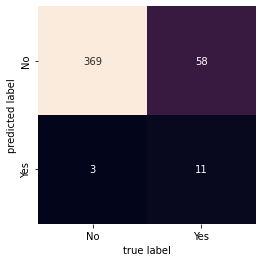

In [31]:
# Confusion Matrix
mat = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('D:/RF Confusion Matrix.png')

# Evaluate results
acc = accuracy_score(y_test, rf_test_pred )
prec = precision_score(y_test, rf_test_pred )
rec = recall_score(y_test, rf_test_pred )
f1 = f1_score(y_test, rf_test_pred )
f2 = fbeta_score(y_test, rf_test_pred, beta=2.0)


results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]], 
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

Cross Validation
- The average accuracy remains very close to the Random Forest model accuracy. The model generalizes well.

In [32]:
kfold = model_selection.KFold(n_splits=10)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.848


#### <a style="color:blue;">Decision Tree</a>

#### Feature Importance

#### <a style="color:blue;">Logistic Regression</a>

#### <a style="color:blue;">Random Forest</a>

MonthlyIncome        0.066675
Age                  0.059344
TotalWorkingYears    0.049797
DailyRate            0.049577
OverTime             0.048402
MonthlyRate          0.048058
DistanceFromHome     0.047693
HourlyRate           0.043872
YearsAtCompany       0.035711
PercentSalaryHike    0.033388
dtype: float64


<AxesSubplot:>

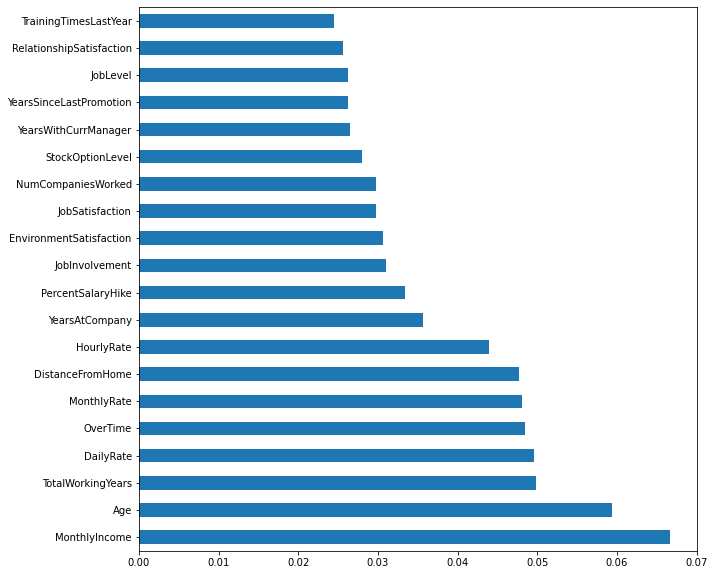

In [33]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False).nlargest(10))

feature_importances = feature_importances.nlargest(20)
feature_importances.plot(kind='barh' , figsize=(10,10)) 
#plt.savefig('D:/RF Features.png')

#### <a style="color:blue;">Decision Tree</a>

---

## Conclusion

In [34]:
# - Sam + Kar Lok (remember link back objective, compile each session short summary )
# - Checking - All

SyntaxError: invalid syntax (4230332797.py, line 1)

---

## Future Work

#### Working Mode
- The COVID-19 pandemic made working from home (WFH) the new way of working.
- More companies are offering permanent remote and hybrid work. 
- Working mode might become a significant factor of employee churn and leads to the next great distruption. 
- Article:  [Companies offering remote and hybrid work](https://www.cnbc.com/2022/04/13/10-companies-that-switched-to-permanent-hybrid-or-remote-work-and-hiring-right-now.html)

#### Employee Benefits 
- Different companies have different benefits packages. A good benefits package can make employees feel rewarded and appreciated for their work. 
- Nowadays, a good pay is not sufficient to retain a good and talented employee. 
- Benefits might become a significant factor of employee churn.
- Article: [Employers can reduce turnover with the right mix of benefits](https://www.501c.com/employers-can-reduce-turnover-with-the-right-mix-of-benefits/#:~:text=A%20new%20report%20finds%20that,a%20138%25%20decrease%20in%20turnover)

---

## Reference 

- Department of Statistics Malaysia. (2022). Retrieved from Key Statistics of Labour Force in Malaysia 2022: https://www.dosm.gov.my/v1/index.php?r=column/pdfPrev&id=UEpPd3dKQkM2ZVRnVFZ3T0w1d1Zrdz09
- Alhashmi, S. M. (2019). Towards Understanding Employee Attrition using a Decision Tree Approach. Proceeding of 2019 International Conference on Digitization: Landscaping Artificial Intelligence, ICD 2019, 44–47. https://doi.org/10.1109/ICD47981.2019.9105767
- Bandyopadhyay, N., & Jadhav, A. (2021). Churn Prediction of Employees Using Machine Learning Techniques. Tehnički Glasnik, 15(1), 51–59. https://doi.org/10.31803/tg-20210204181812
- El-Rayes, N., Fang, M., Smith, M., & Taylor, S. M. (2020). Predicting employee attrition using tree-based models. International Journal of Organizational Analysis, 28(6), 1273–1291. https://doi.org/10.1108/IJOA-10-2019-1903
- Fallucchi, F., Coladangelo, M., Giuliano, R., & De Luca, E. W. (2020). Predicting employee attrition using machine learning techniques. Computers, 9(4), 1–17. https://doi.org/10.3390/computers9040086
- Habous, A., Nfaoui, E. H., & Oubenaalla, Y. (2021). Predicting Employee Attrition using Supervised Learning Classification Models. 5th International Conference on Intelligent Computing in Data Sciences, ICDS 2021, 0–4. https://doi.org/10.1109/ICDS53782.2021.9626761
- Jain, P. K., Jain, M., & Pamula, R. (2020). Explaining and predicting employees’ attrition: a machine learning approach. SN Applied Sciences, 2(4), 1–11. https://doi.org/10.1007/s42452-020-2519-4
- Pratt, M., Boudhane, M., & Cakula, S. (2021). Employee attrition estimation using random forest algorithm. Baltic Journal of Modern Computing, 9(1), 49–66. https://doi.org/10.22364/BJMC.2021.9.1.04
- Sadana, P., & Munnuru, D. (2022). Machine Learning Model to Predict Work Force Attrition. Lecture Notes in Networks and Systems, 237, 361–376. https://doi.org/10.1007/978-981-16-6407-6_33
- Srivastava, P. R., & Eachempati, P. (2021). Intelligent Employee Retention System for Attrition Rate Analysis and Churn Prediction: An Ensemble Machine Learning and Multi- Criteria Decision-Making Approach. Journal of Global Information Management, 29(6), 1–29. https://doi.org/10.4018/JGIM.20211101.oa23
- Yahia, N. Ben, Hlel, J., & Colomo-Palacios, R. (2021). From Big Data to Deep Data to Support People Analytics for Employee Attrition Prediction. IEEE Access, 9, 60447–60458. https://doi.org/10.1109/ACCESS.2021.3074559

---